In [1]:
import scanpy as sc
import pandas as pd
import pickle
import scnsbm 
import time
import anndata
import sklearn.metrics
%matplotlib notebook
%pylab

/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_table("matrix_mixology/sc_dropseq.count.csv.gz", compression="gzip", sep=",")
nomi=pd.read_csv('regressed_genes/nomi_geni.txt.gz', compression= 'gzip')
cell_cycle_genes = [x.strip() for x in open('regressed_genes/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
ensg_s_genes =[nomi.loc[idx, "Gene stable ID"] for idx in nomi.index if nomi.loc[idx, "Gene name"] in s_genes]
ensg_g2m_genes =[nomi.loc[idx, "Gene stable ID"] for idx in nomi.index if nomi.loc[idx, "Gene name"] in g2m_genes]
adata = anndata.AnnData(df.T)#.values.T, obs=df.columns, var=df.index)
mito_genes = [nomi.loc[idx, "Gene stable ID"] for idx in nomi.index if nomi.loc[idx, "Gene name"].startswith("MT-") and nomi.loc[idx, "Gene stable ID"] in adata.var_names]
 
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1) 
adata.obs['n_counts'] = adata.X.sum(axis=1)
np.sum(adata[:, mito_genes].X, axis=1)                                            
                                            

adata = adata[adata.obs['percent_mito'] < 0.05, :]
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.tl.score_genes_cell_cycle(adata, s_genes=ensg_s_genes, g2m_genes=ensg_g2m_genes)

sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.regress_out(adata, ['S_score', 'G2M_score','n_counts', 'percent_mito'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
adata.write('mi_dropseq/adata_base.h5ad')

Trying to set attribute `.obs` of view, making a copy.


Trying to set attribute `.obs` of view, making a copy.
... storing 'phase' as categorical


In [2]:
adata=sc.read('mi_dropseq/adata_base.h5ad')

In [3]:
nei=[5,10,20,30,40,50,100]
adatone=[]
for x in nei:
    adata=sc.read('mi_dropseq/adata_base.h5ad')
    sc.pp.neighbors(adata, n_neighbors=x, n_pcs=40)
    adatone.append(adata)
adatone[0].write('mi_dropseq/adata_5.h5ad')
adatone[1].write('mi_dropseq/adata_10.h5ad')
adatone[2].write('mi_dropseq/adata_20.h5ad')
adatone[3].write('mi_dropseq/adata_30.h5ad')
adatone[4].write('mi_dropseq/adata_40.h5ad')
adatone[5].write('mi_dropseq/adata_50.h5ad')
adatone[6].write('mi_dropseq/adata_100.h5ad')

In [4]:
adata5=sc.read('mi_dropseq/adata_5.h5ad')
adata10=sc.read('mi_dropseq/adata_10.h5ad')
adata20=sc.read('mi_dropseq/adata_20.h5ad')
adata30=sc.read('mi_dropseq/adata_30.h5ad')
adata40=sc.read('mi_dropseq/adata_40.h5ad')
adata50=sc.read('mi_dropseq/adata_50.h5ad')
adata100=sc.read('mi_dropseq/adata_100.h5ad')

In [20]:
cell_annotation= pd.read_table('matrix_mixology/sc_dropseq.metadata.csv.gz', compression="gzip", sep=",", index_col=0)
adata5.obs.loc[:, "cell_line"] = cell_annotation.loc[adata5.obs_names, "cell_line"]
adata10.obs.loc[:, "cell_line"] = cell_annotation.loc[adata10.obs_names, "cell_line"]
adata20.obs.loc[:, "cell_line"] = cell_annotation.loc[adata20.obs_names, "cell_line"]
adata30.obs.loc[:, "cell_line"] = cell_annotation.loc[adata30.obs_names, "cell_line"]
adata40.obs.loc[:, "cell_line"] = cell_annotation.loc[adata40.obs_names, "cell_line"]
adata50.obs.loc[:, "cell_line"] = cell_annotation.loc[adata50.obs_names, "cell_line"]
adata100.obs.loc[:, "cell_line"] = cell_annotation.loc[adata100.obs_names, "cell_line"]
adata5.write('mi_dropseq/adata_5.h5ad')
adata10.write('mi_dropseq/adata_10.h5ad')
adata20.write('mi_dropseq/adata_20.h5ad')
adata30.write('mi_dropseq/adata_30.h5ad')
adata40.write('mi_dropseq/adata_40.h5ad')
adata50.write('mi_dropseq/adata_50.h5ad')
adata100.write('mi_dropseq/adata_100.h5ad')

... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical


In [2]:
adata5=sc.read('mi_dropseq/adata_5.h5ad')
adata10=sc.read('mi_dropseq/adata_10.h5ad')
adata20=sc.read('mi_dropseq/adata_20.h5ad')
adata30=sc.read('mi_dropseq/adata_30.h5ad')
adata40=sc.read('mi_dropseq/adata_40.h5ad')
adata50=sc.read('mi_dropseq/adata_50.h5ad')
adata100=sc.read('mi_dropseq/adata_100.h5ad')

# 1) leiden in range
### 1.1) leiden unweighted

In [7]:
adata5=sc.read('mi_dropseq/adata_5.h5ad')
adata10=sc.read('mi_dropseq/adata_10.h5ad')
adata20=sc.read('mi_dropseq/adata_20.h5ad')
adata30=sc.read('mi_dropseq/adata_30.h5ad')
adata40=sc.read('mi_dropseq/adata_40.h5ad')
adata50=sc.read('mi_dropseq/adata_50.h5ad')
adata100=sc.read('mi_dropseq/adata_100.h5ad')

In [10]:
resolutions = np.arange(0, 1, 0.005)

In [8]:
leiden_clusters = pd.DataFrame(index=adata5.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata5, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata5.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_5_unweighted.csv')

In [9]:
leiden_clusters = pd.DataFrame(index=adata10.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata10, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata10.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_10_unweighted.csv')

In [10]:
leiden_clusters = pd.DataFrame(index=adata20.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata20, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata20.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_20_unweighted.csv')

In [11]:
leiden_clusters = pd.DataFrame(index=adata30.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata30, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata30.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_30_unweighted.csv')

In [12]:
leiden_clusters = pd.DataFrame(index=adata40.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata40, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata40.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_40_unweighted.csv')

In [11]:
leiden_clusters = pd.DataFrame(index=adata50.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata50, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata50.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_50_unweighted.csv')

In [12]:
leiden_clusters = pd.DataFrame(index=adata100.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata100, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata100.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_100_unweighted.csv')

In [3]:
unw_leiden_clusters5=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_5_unweighted.csv')
unw_leiden_clusters10=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_10_unweighted.csv')
unw_leiden_clusters20=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_20_unweighted.csv')
unw_leiden_clusters30=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_30_unweighted.csv')
unw_leiden_clusters40=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_40_unweighted.csv')
unw_leiden_clusters50=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_50_unweighted.csv')
unw_leiden_clusters100=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_100_unweighted.csv')

### 1.2) leiden weighted

In [14]:
adata5=sc.read('mi_dropseq/adata_5.h5ad')
adata10=sc.read('mi_dropseq/adata_10.h5ad')
adata20=sc.read('mi_dropseq/adata_20.h5ad')
adata30=sc.read('mi_dropseq/adata_30.h5ad')
adata40=sc.read('mi_dropseq/adata_40.h5ad')
adata50=sc.read('mi_dropseq/adata_50.h5ad')
adata100=sc.read('mi_dropseq/adata_100.h5ad')

In [15]:
leiden_clusters = pd.DataFrame(index=adata5.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata5, resolution=r, use_weights=True)
    leiden_clusters.loc[:, r] = adata5.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_5_weighted.csv')

In [16]:
leiden_clusters = pd.DataFrame(index=adata10.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata10, resolution=r, use_weights=True)
    leiden_clusters.loc[:, r] = adata10.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_10_weighted.csv')

In [17]:
leiden_clusters = pd.DataFrame(index=adata20.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata20, resolution=r, use_weights=True)
    leiden_clusters.loc[:, r] = adata20.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_20_weighted.csv')

In [15]:
leiden_clusters = pd.DataFrame(index=adata30.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata30, resolution=r, use_weights=True)
    leiden_clusters.loc[:, r] = adata30.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_30_weighted.csv')

In [16]:
leiden_clusters = pd.DataFrame(index=adata40.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata40, resolution=r, use_weights=True)
    leiden_clusters.loc[:, r] = adata40.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_40_weighted.csv')

In [18]:
leiden_clusters = pd.DataFrame(index=adata50.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata50, resolution=r, use_weights=True)
    leiden_clusters.loc[:, r] = adata50.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_50_weighted.csv')

In [19]:
leiden_clusters = pd.DataFrame(index=adata100.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata100, resolution=r, use_weights=True)
    leiden_clusters.loc[:, r] = adata100.obs.leiden
leiden_clusters.to_csv('mi_dropseq/dropseq_leiden_clusters_100_weighted.csv')

In [4]:
w_leiden_clusters5=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_5_weighted.csv')
w_leiden_clusters10=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_10_weighted.csv')
w_leiden_clusters20=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_20_weighted.csv')
w_leiden_clusters30=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_30_weighted.csv')
w_leiden_clusters40=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_40_weighted.csv')
w_leiden_clusters50=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_50_weighted.csv')
w_leiden_clusters100=pd.read_csv('mi_dropseq/dropseq_leiden_clusters_100_weighted.csv')

# 2) nsbm
### 2.1) nsbm unweighted

In [18]:
adata5=sc.read('mi_dropseq/adata_5.h5ad')
adata10=sc.read('mi_dropseq/adata_10.h5ad')
adata20=sc.read('mi_dropseq/adata_20.h5ad')
adata30=sc.read('mi_dropseq/adata_30.h5ad')
adata40=sc.read('mi_dropseq/adata_40.h5ad')
adata50=sc.read('mi_dropseq/adata_50.h5ad')
adata100=sc.read('mi_dropseq/adata_100.h5ad')

In [21]:
a=time.time()
scnsbm.inference.nested_model(adata5)
b=time.time()
scnsbm.inference.nested_model(adata10)
c=time.time()
scnsbm.inference.nested_model(adata20)
d=time.time()
scnsbm.inference.nested_model(adata30)
e=time.time()
scnsbm.inference.nested_model(adata40)
f=time.time()
scnsbm.inference.nested_model(adata50)
g=time.time()
scnsbm.inference.nested_model(adata100)
h=time.time()
aa=b-a
bb=c-b
cc=d-c
dd=e-d
ee=f-e
ff=g-f
gg=h-g
print(aa,bb,cc,dd,ee,ff,gg)
adata5.write('mi_dropseq/adata_5_unweighted.h5ad')
adata10.write('mi_dropseq/adata_10_unweighted.h5ad')
adata20.write('mi_dropseq/adata_20_unweighted.h5ad')
adata30.write('mi_dropseq/adata_30_unweighted.h5ad')
adata40.write('mi_dropseq/adata_40_unweighted.h5ad')
adata50.write('mi_dropseq/adata_50_unweighted.h5ad')
adata100.write('mi_dropseq/adata_100_unweighted.h5ad')

591.7541303634644 454.50305700302124 512.7420108318329 551.5561654567719 928.4086518287659 665.4999256134033 2350.461627483368


In [ ]:
adata5.write('mi_dropseq/adata_5_unweighted.h5ad')
adata10.write('mi_dropseq/adata_10_unweighted.h5ad')
adata20.write('mi_dropseq/adata_20_unweighted.h5ad')
adata30.write('mi_dropseq/adata_30_unweighted.h5ad')
adata40.write('mi_dropseq/adata_40_unweighted.h5ad')
adata50.write('mi_dropseq/adata_50_unweighted.h5ad')
adata100.write('mi_dropseq/adata_100_unweighted.h5ad')

In [5]:
unw_adata5=sc.read('mi_dropseq/adata_5_unweighted.h5ad')
unw_adata10=sc.read('mi_dropseq/adata_10_unweighted.h5ad')
unw_adata20=sc.read('mi_dropseq/adata_20_unweighted.h5ad')
unw_adata30=sc.read('mi_dropseq/adata_30_unweighted.h5ad')
unw_adata40=sc.read('mi_dropseq/adata_40_unweighted.h5ad')
unw_adata50=sc.read('mi_dropseq/adata_50_unweighted.h5ad')
unw_adata100=sc.read('mi_dropseq/adata_100_unweighted.h5ad')

### 2.2) nsbm weighted

In [20]:
adata5=sc.read('mi_dropseq/adata_5.h5ad')
adata10=sc.read('mi_dropseq/adata_10.h5ad')
adata20=sc.read('mi_dropseq/adata_20.h5ad')
adata30=sc.read('mi_dropseq/adata_30.h5ad')
adata40=sc.read('mi_dropseq/adata_40.h5ad')
adata50=sc.read('mi_dropseq/adata_50.h5ad')
adata100=sc.read('mi_dropseq/adata_100.h5ad')

In [21]:
a=time.time()
scnsbm.inference.nested_model(adata5,use_weights=True)
b=time.time()
scnsbm.inference.nested_model(adata10,use_weights=True)
c=time.time()
scnsbm.inference.nested_model(adata20,use_weights=True)
d=time.time()
scnsbm.inference.nested_model(adata30,use_weights=True)
e=time.time()
scnsbm.inference.nested_model(adata40,use_weights=True)
f=time.time()
scnsbm.inference.nested_model(adata50,use_weights=True)
g=time.time()
scnsbm.inference.nested_model(adata100,use_weights=True)
h=time.time()
aa=b-a
bb=c-b
cc=d-c
dd=e-d
ee=f-e
ff=g-f
gg=h-g
print(aa,bb,cc,dd,ee,ff,gg)
adata5.write('mi_dropseq/adata_5_weighted.h5ad')
adata10.write('mi_dropseq/adata_10_weighted.h5ad')
adata20.write('mi_dropseq/adata_20_weighted.h5ad')
adata30.write('mi_dropseq/adata_30_weighted.h5ad')
adata40.write('mi_dropseq/adata_40_weighted.h5ad')
adata50.write('mi_dropseq/adata_50_weighted.h5ad')
adata100.write('mi_dropseq/adata_100_weighted.h5ad')

688.0858466625214 344.09724402427673 561.0839443206787 569.3349716663361 526.8006634712219


In [22]:
w_adata5=sc.read('mi_dropseq/adata_5_weighted.h5ad')
w_adata10=sc.read('mi_dropseq/adata_10_weighted.h5ad')
w_adata20=sc.read('mi_dropseq/adata_20_weighted.h5ad')
w_adata30=sc.read('mi_dropseq/adata_30_weighted.h5ad')
w_adata40=sc.read('mi_dropseq/adata_40_weighted.h5ad')
w_adata50=sc.read('mi_dropseq/adata_50_weighted.h5ad')
w_adata100=sc.read('mi_dropseq/adata_100_weighted.h5ad')

# representation
### unweighted

<IPython.core.display.Javascript object>


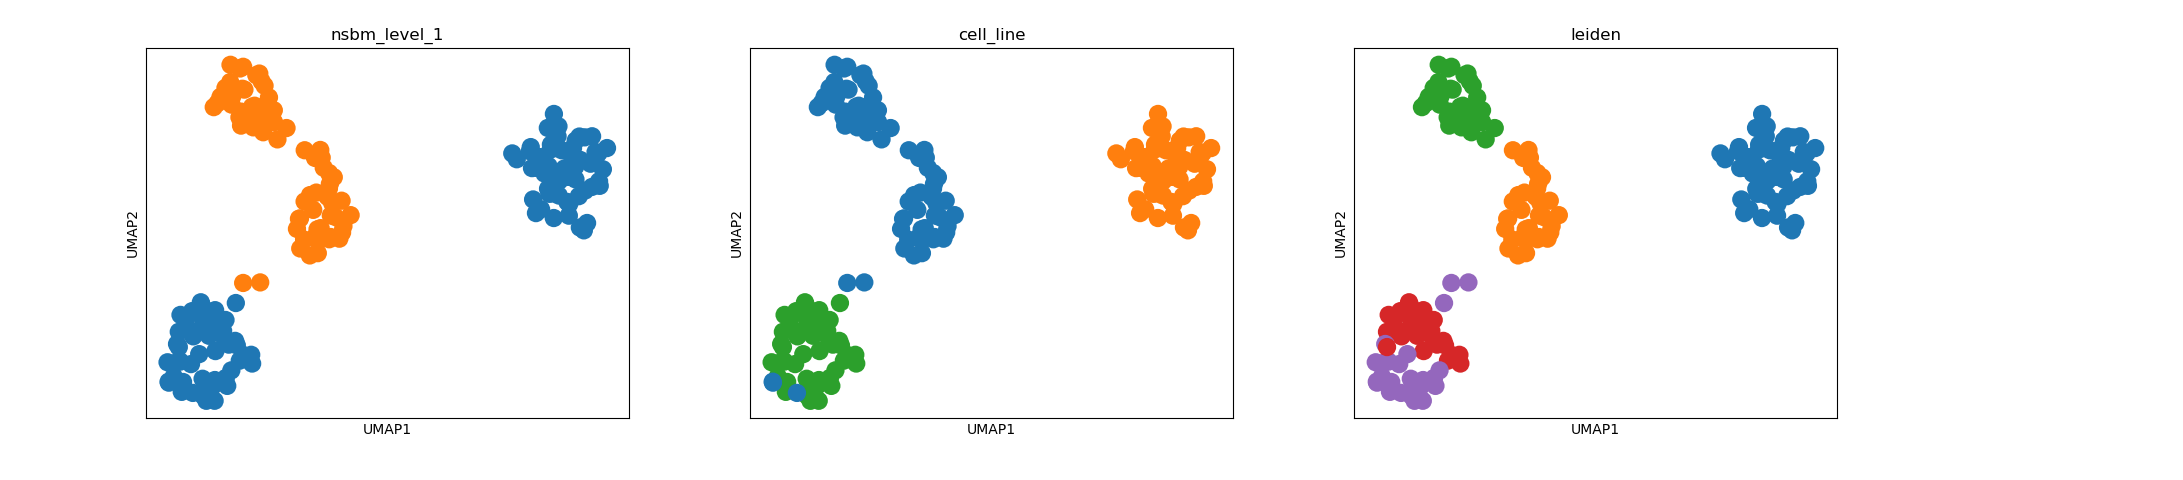

<IPython.core.display.Javascript object>


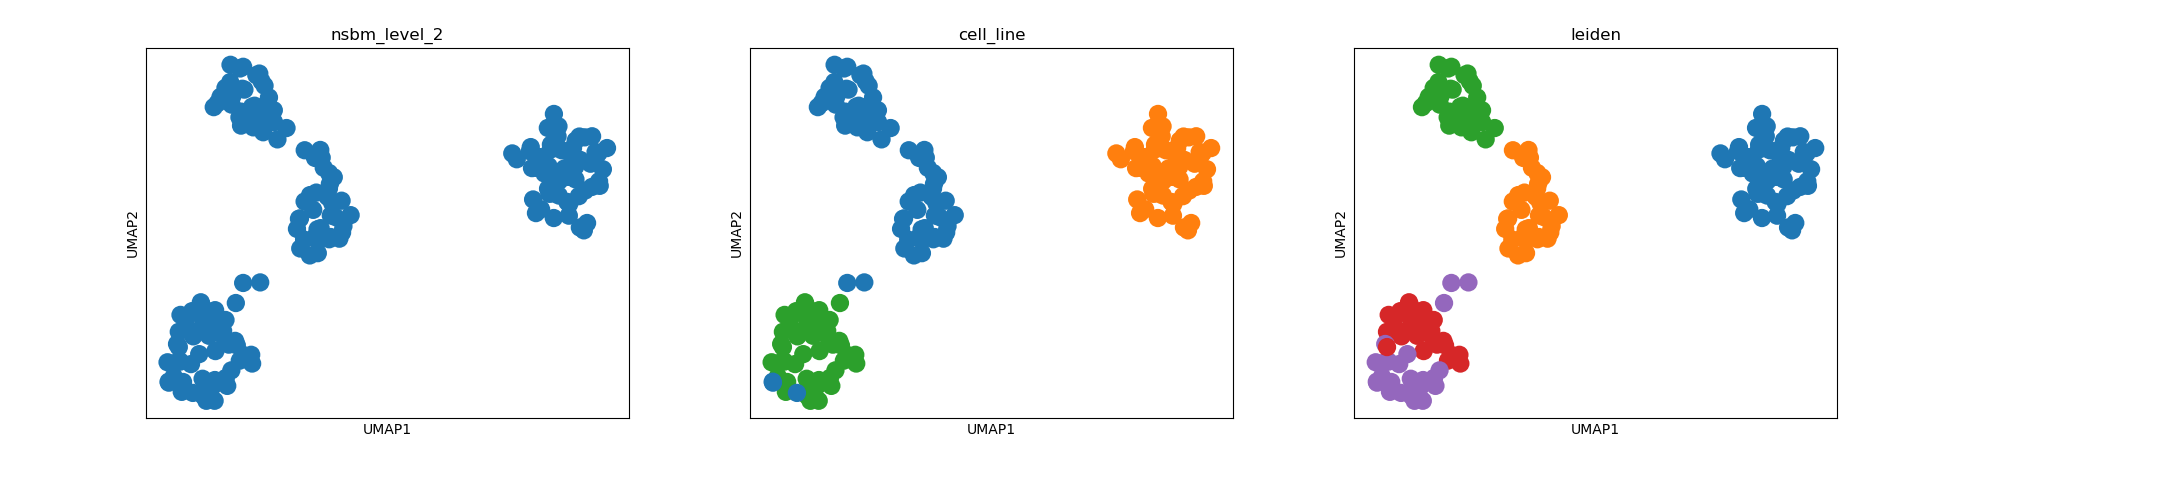

<IPython.core.display.Javascript object>


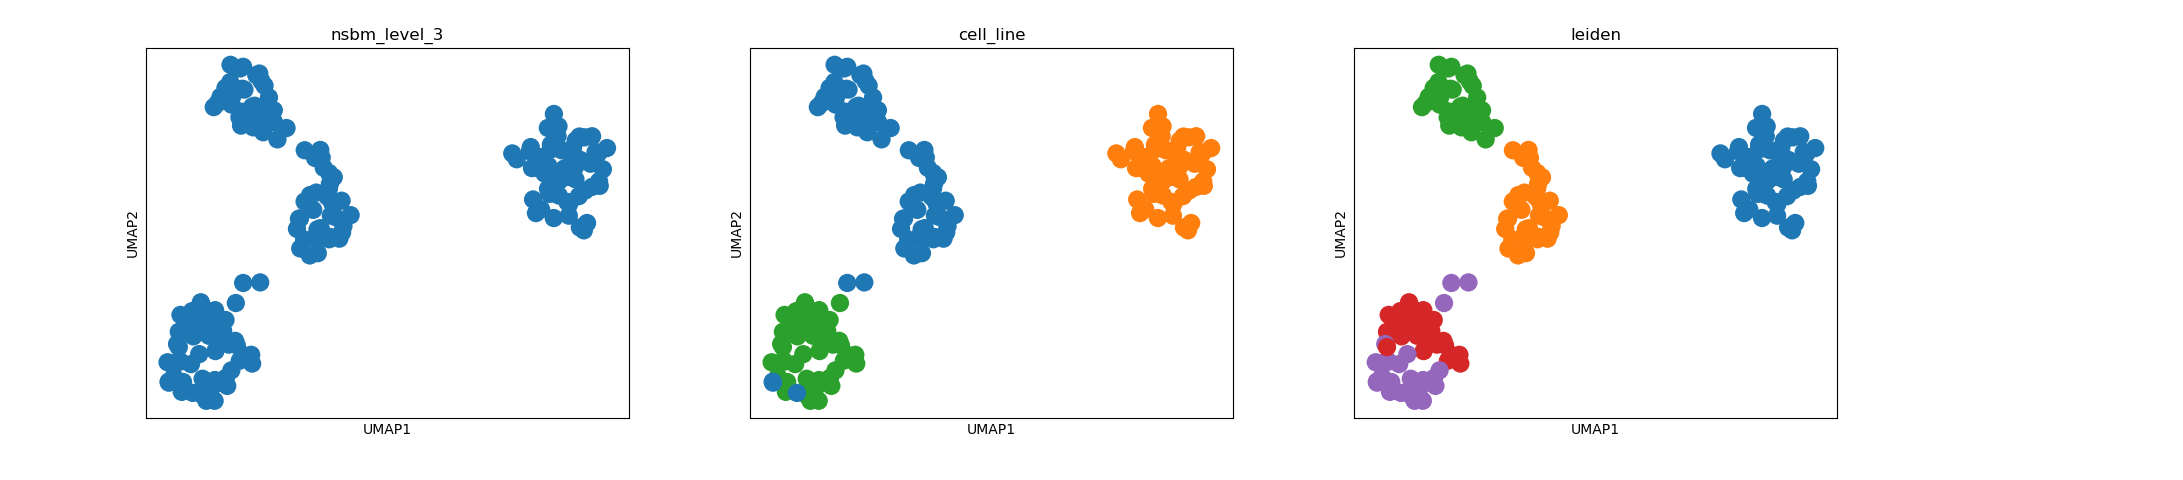

<IPython.core.display.Javascript object>


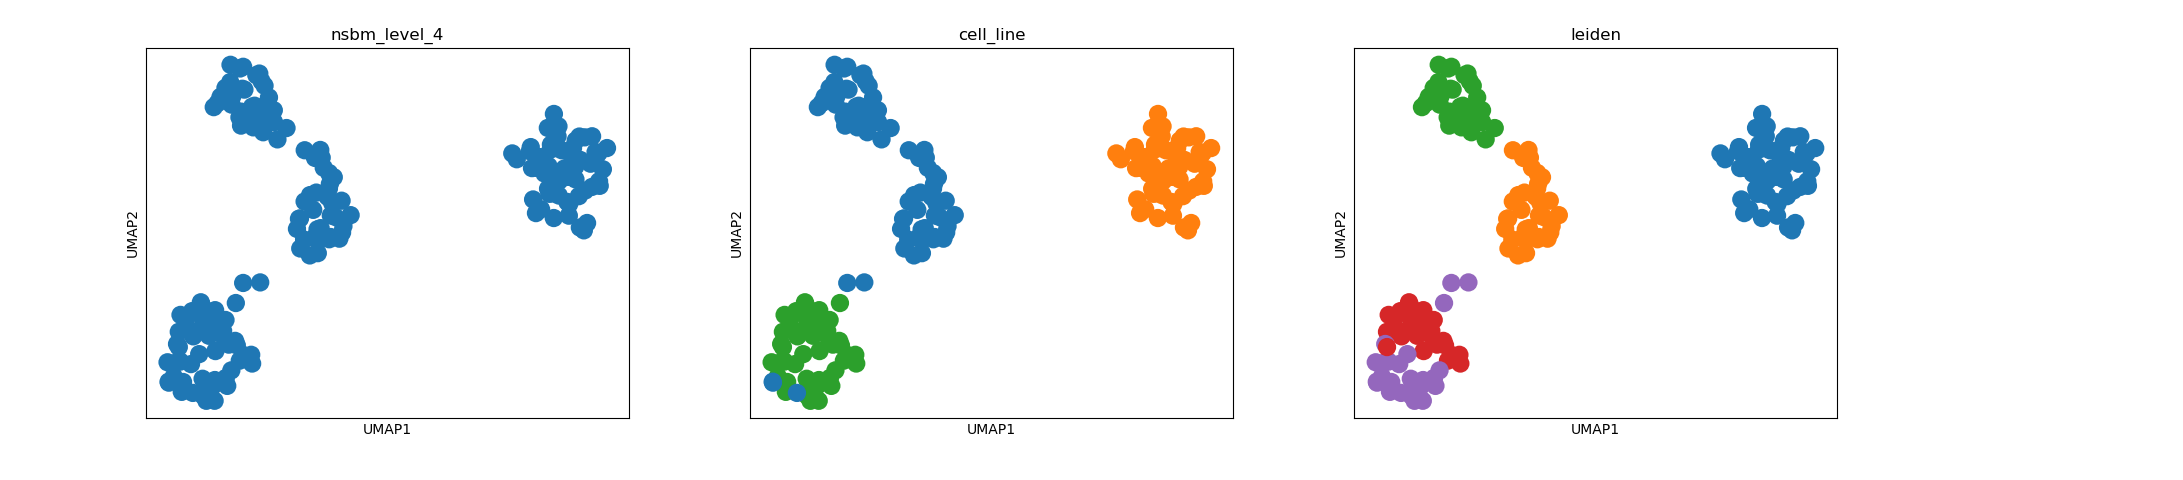

In [23]:
sc.tl.umap(unw_adata5)
sc.tl.leiden(unw_adata5)
sc.pl.umap(unw_adata5, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata5, color=["nsbm_level_2",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata5, color=["nsbm_level_3",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata5, color=["nsbm_level_4", 'cell_line','leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


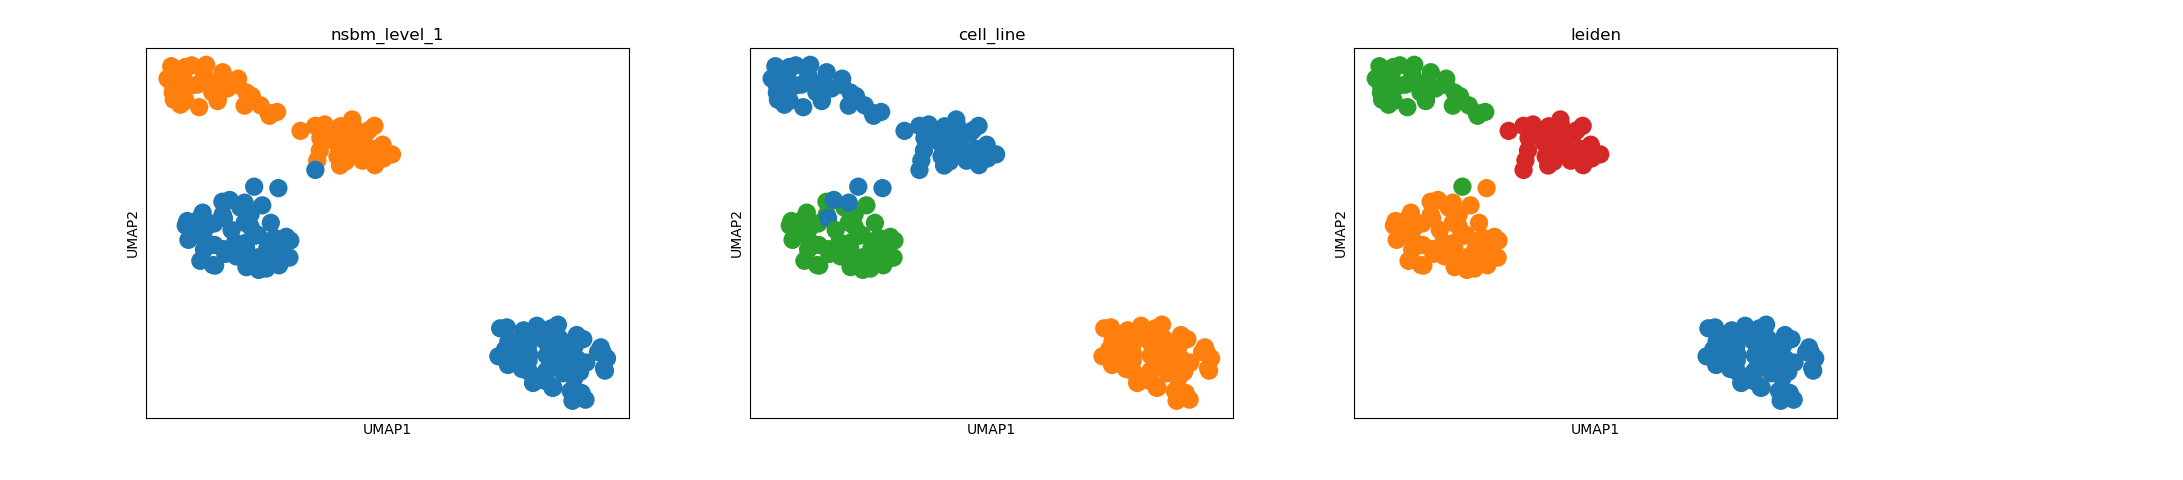

<IPython.core.display.Javascript object>


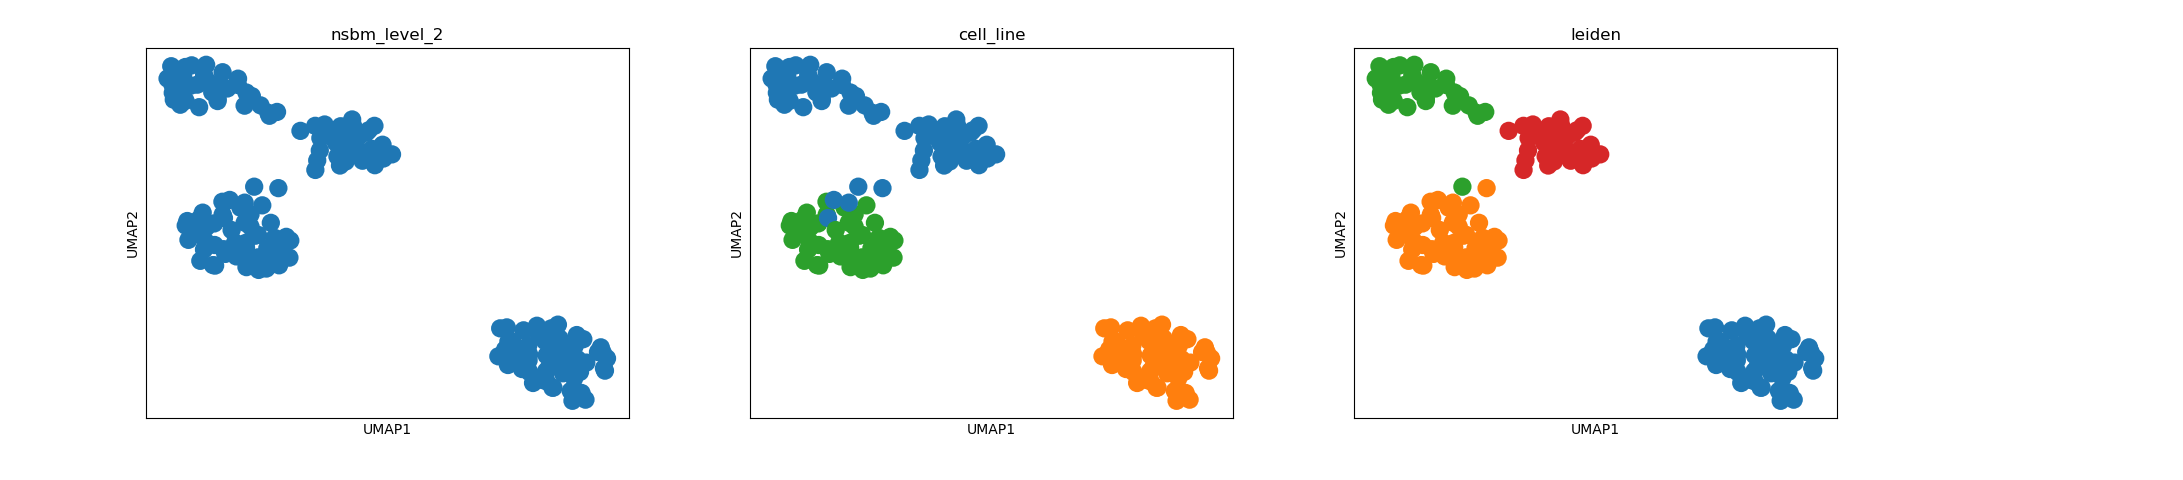

<IPython.core.display.Javascript object>


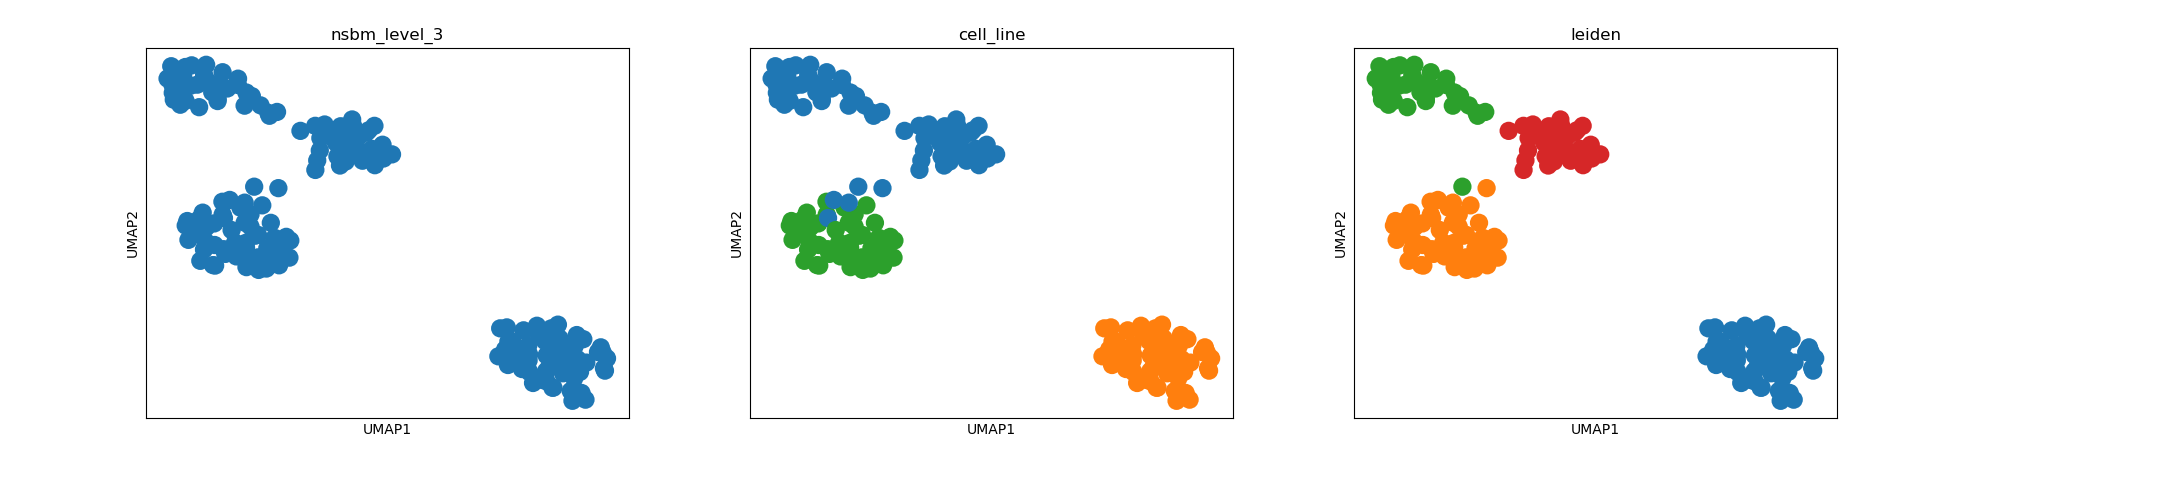

<IPython.core.display.Javascript object>


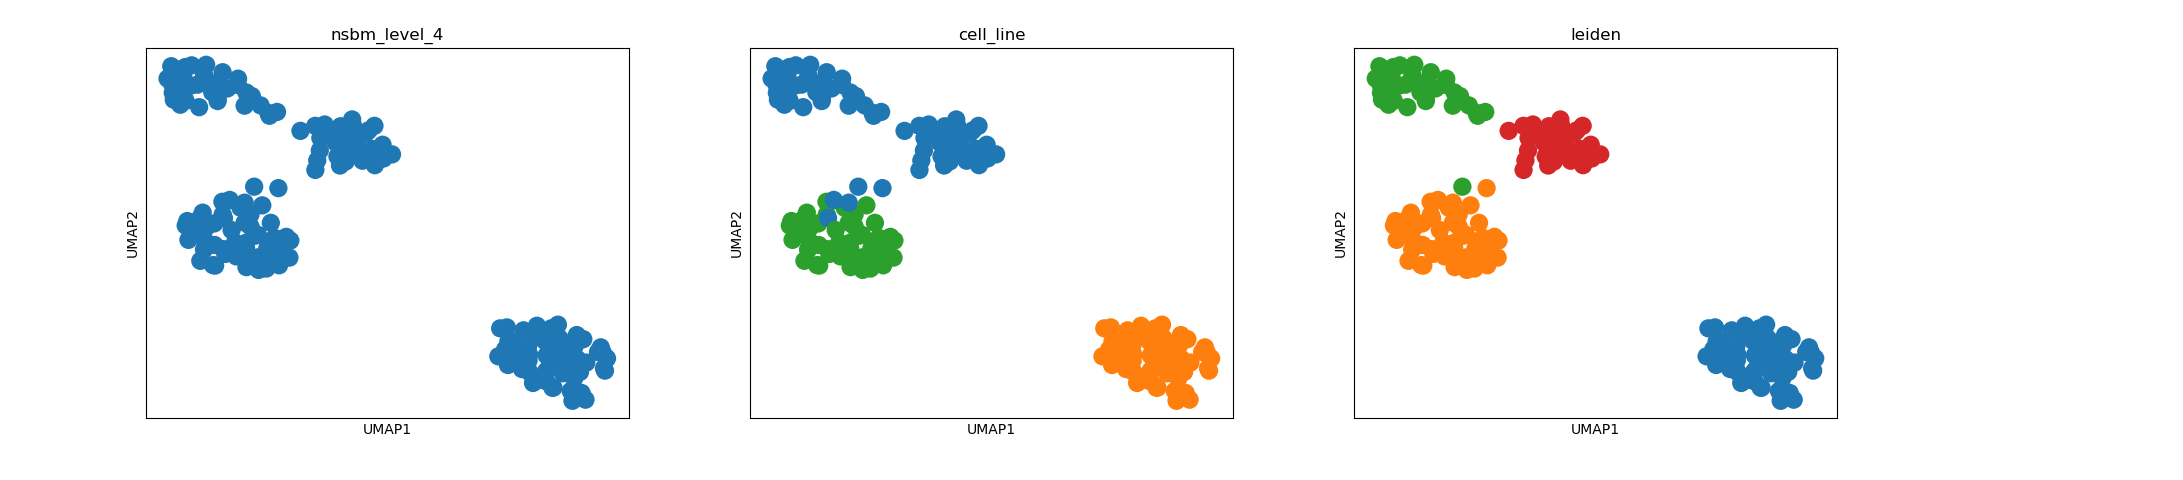

In [24]:
sc.tl.umap(unw_adata10)
sc.tl.leiden(unw_adata10)
sc.pl.umap(unw_adata10, color=["nsbm_level_1", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata10, color=["nsbm_level_2", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata10, color=["nsbm_level_3", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata10, color=["nsbm_level_4", 'cell_line','leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


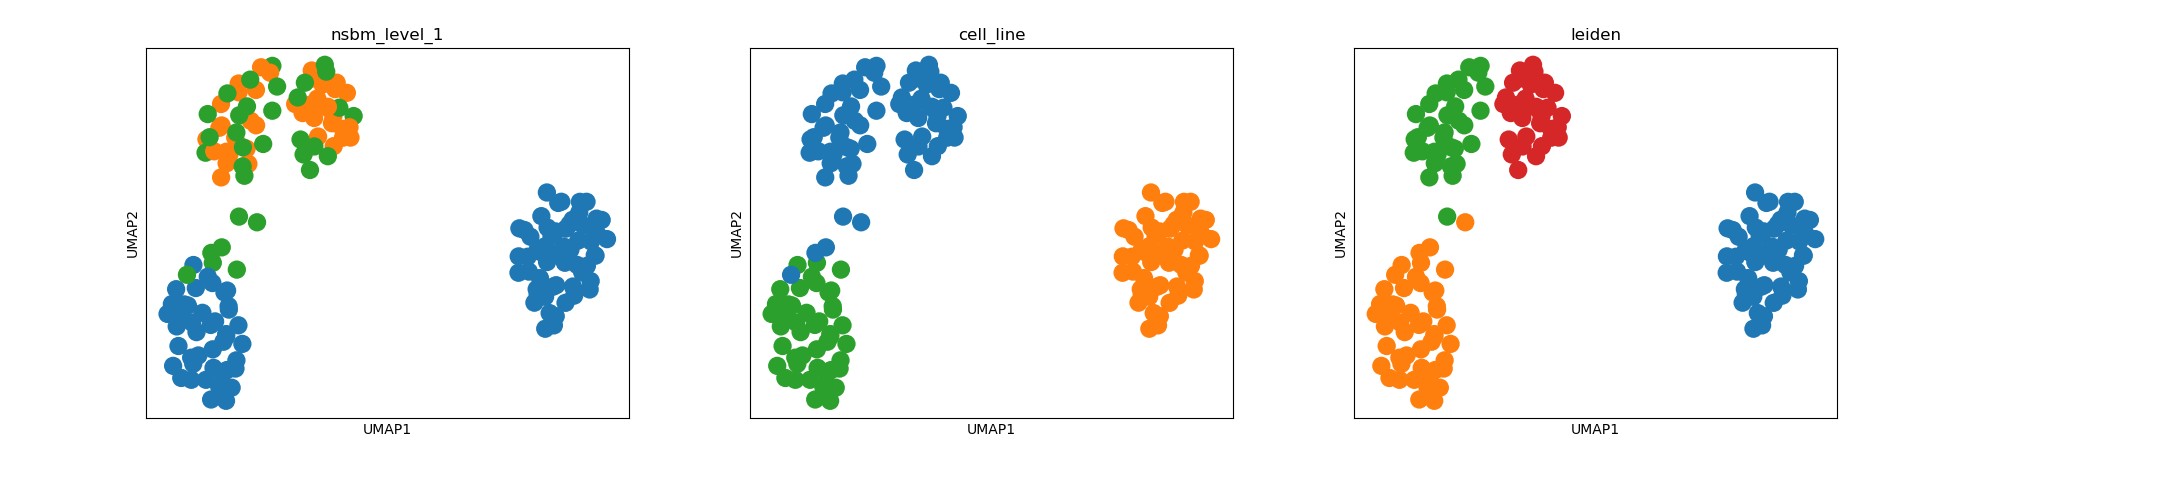

<IPython.core.display.Javascript object>


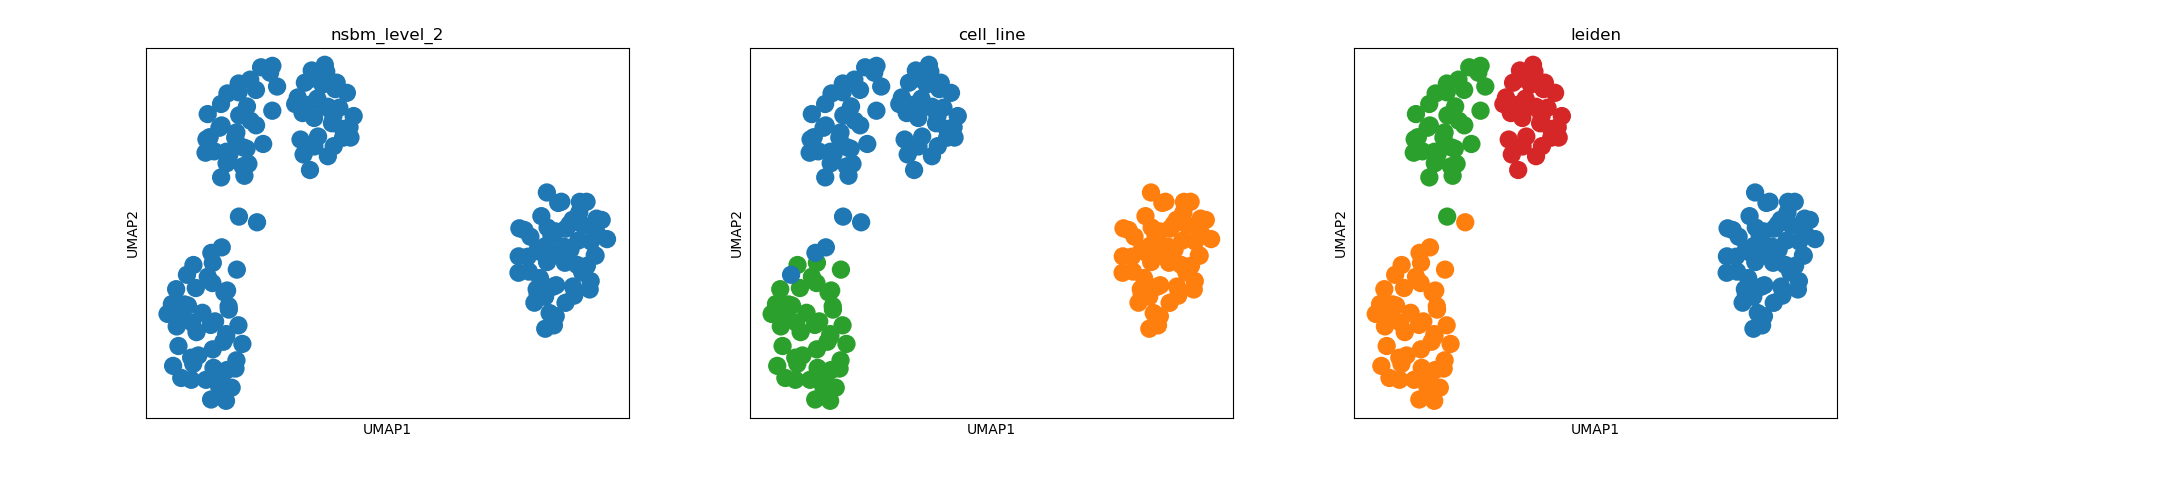

<IPython.core.display.Javascript object>


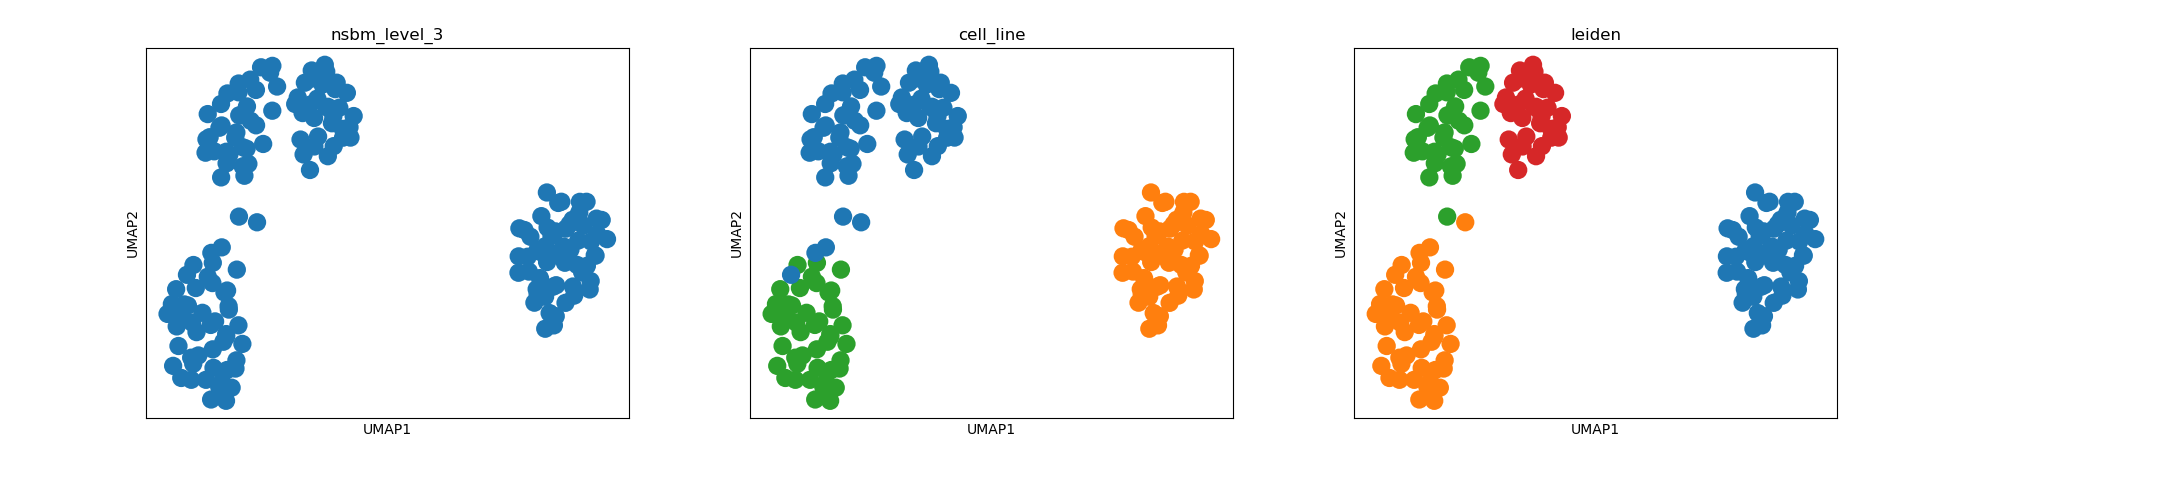

<IPython.core.display.Javascript object>


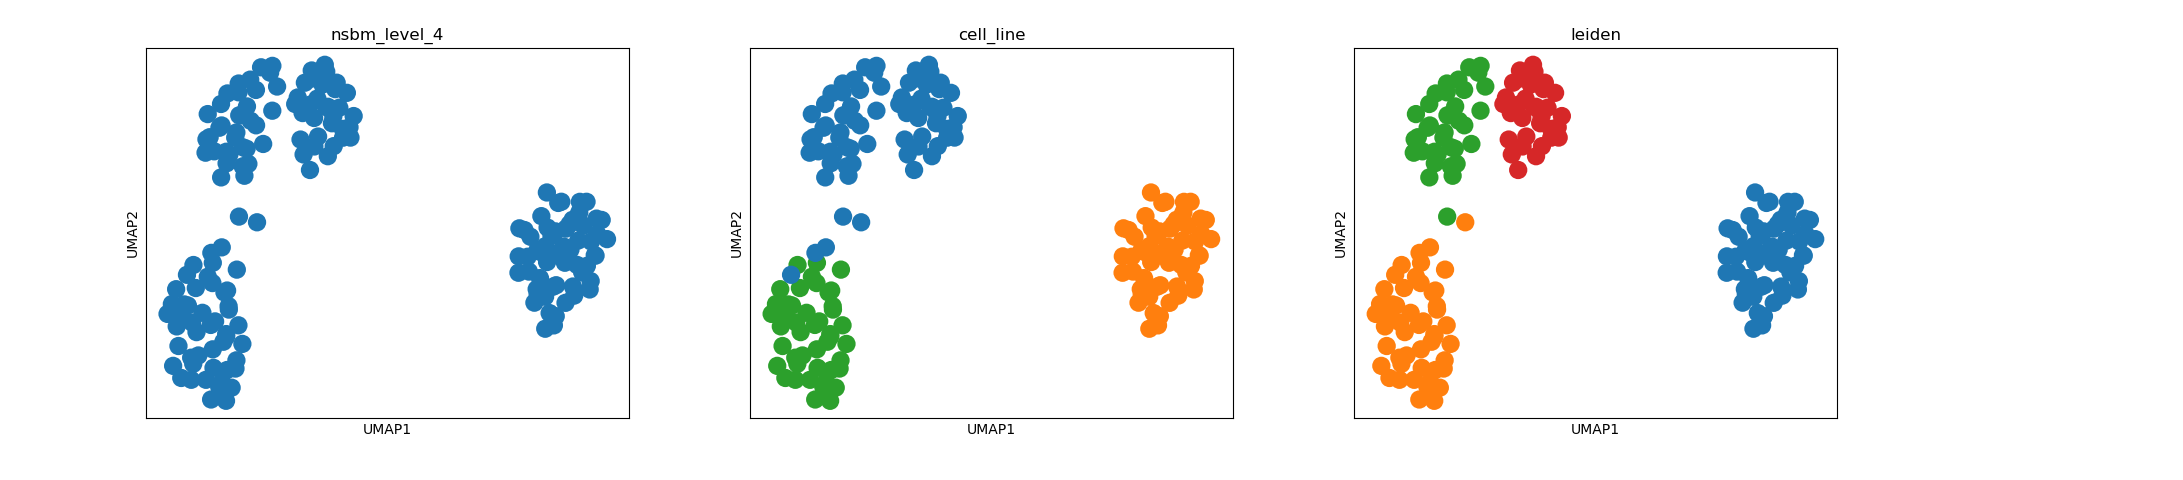

<IPython.core.display.Javascript object>


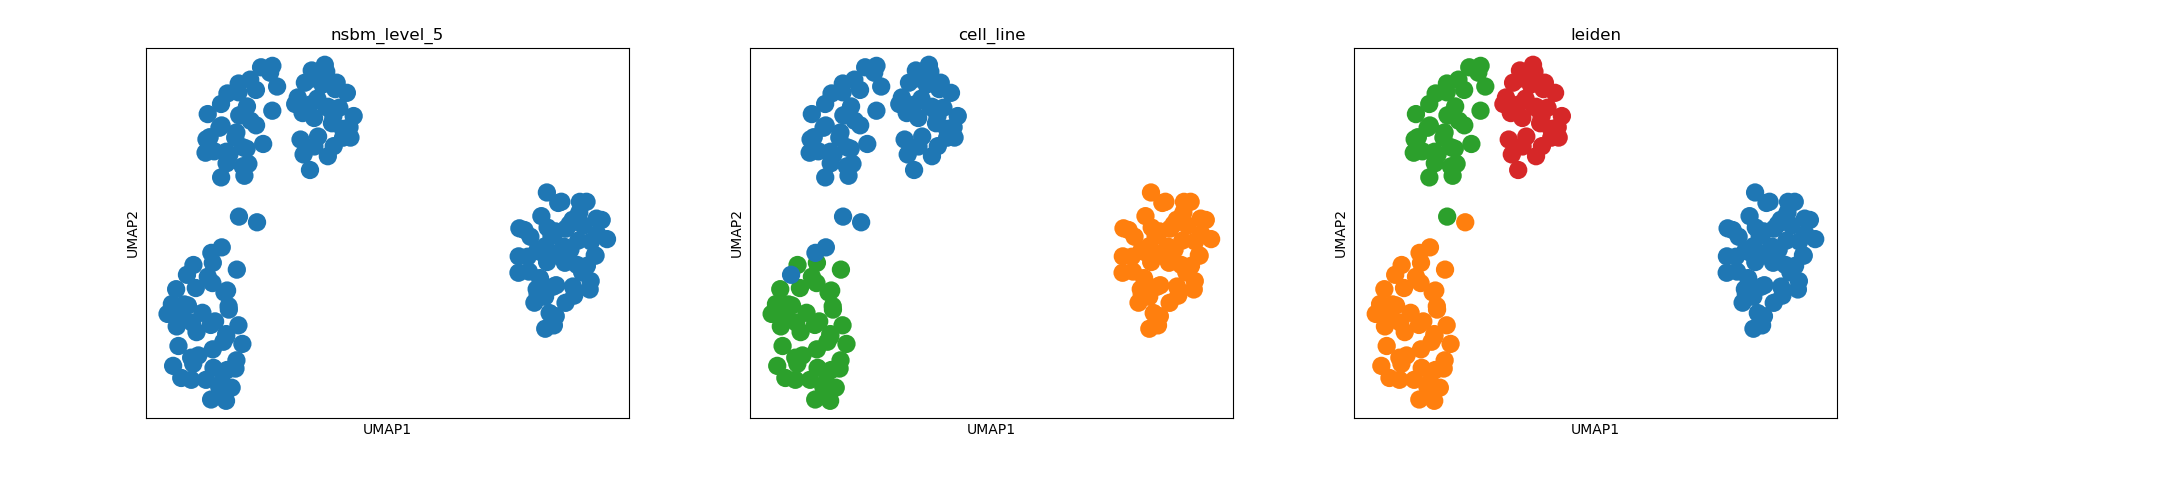

<IPython.core.display.Javascript object>


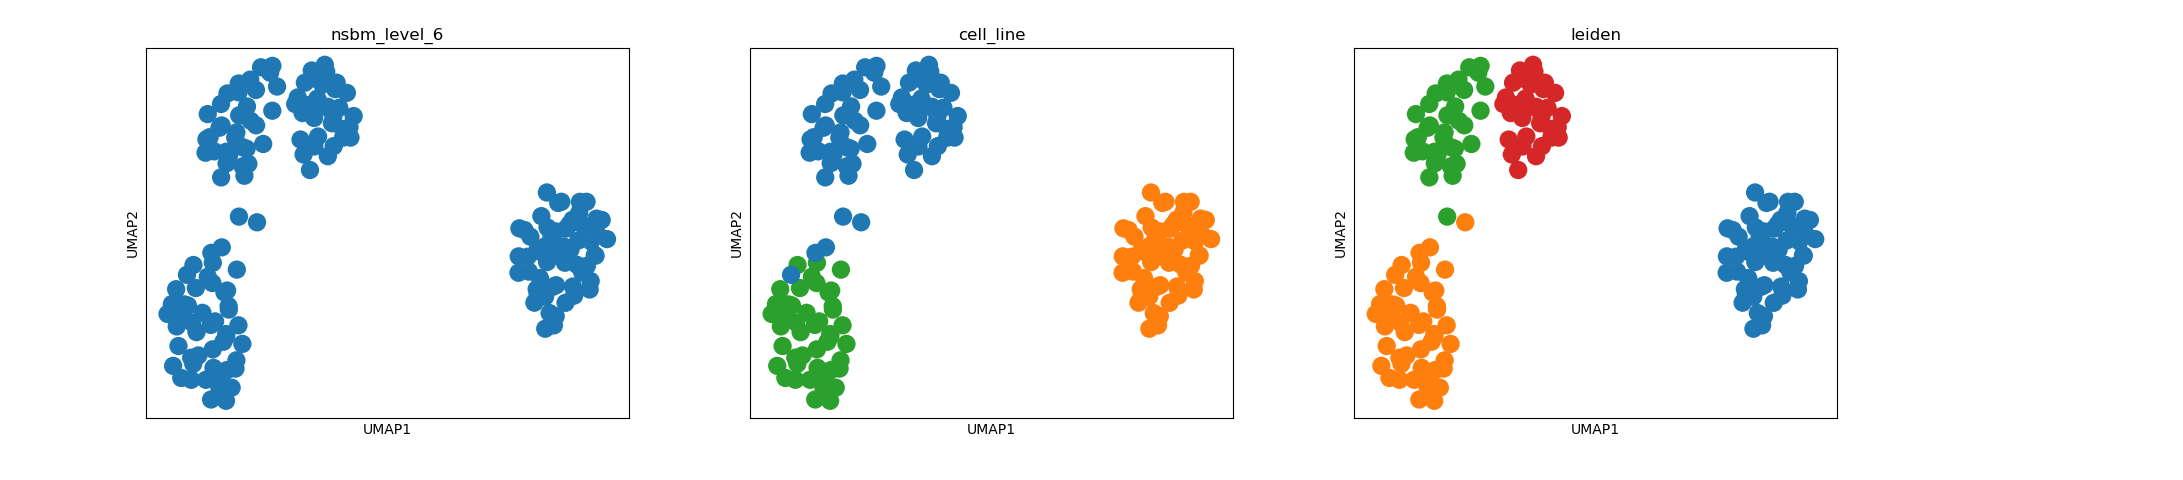

In [25]:
sc.tl.umap(unw_adata20)
sc.tl.leiden(unw_adata20)
sc.pl.umap(unw_adata20, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_2",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_3",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_4",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_5", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_6",'cell_line', 'leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


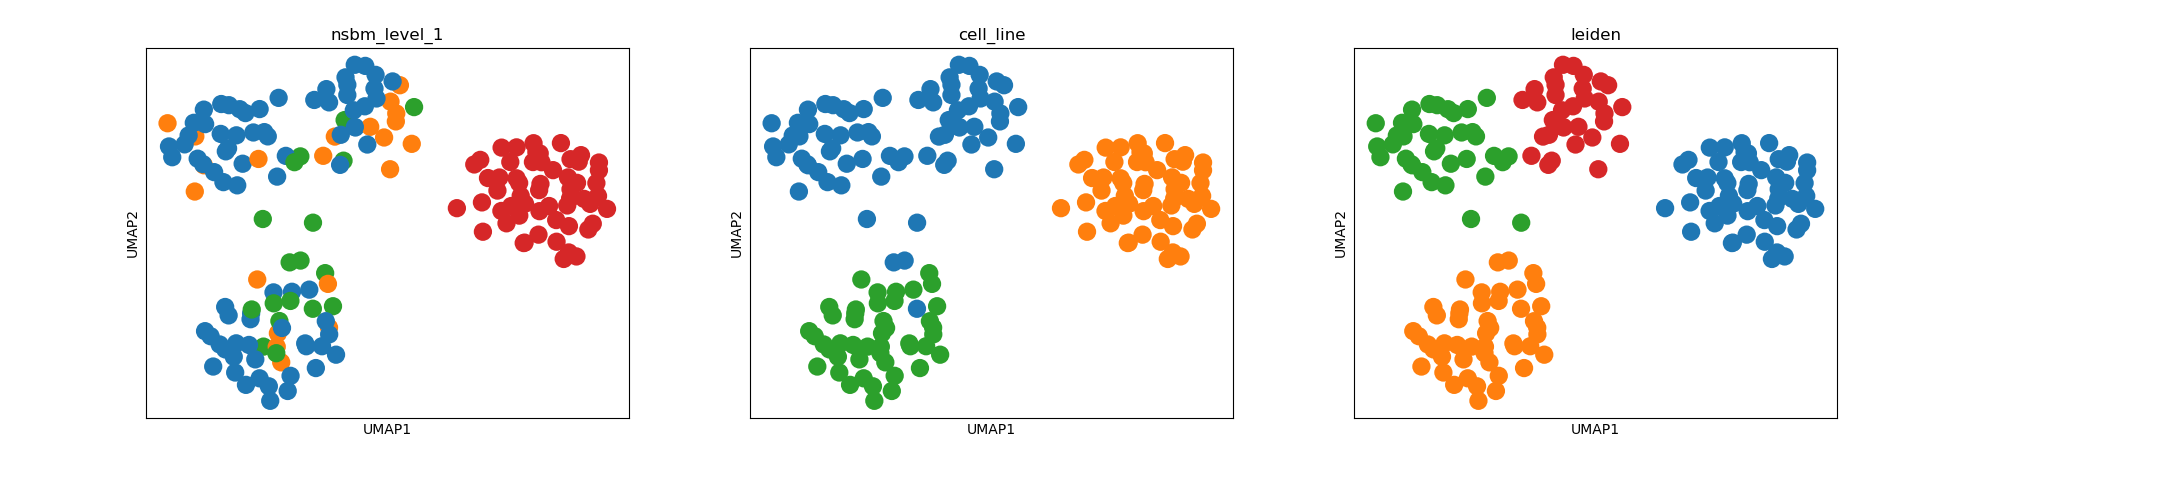

<IPython.core.display.Javascript object>


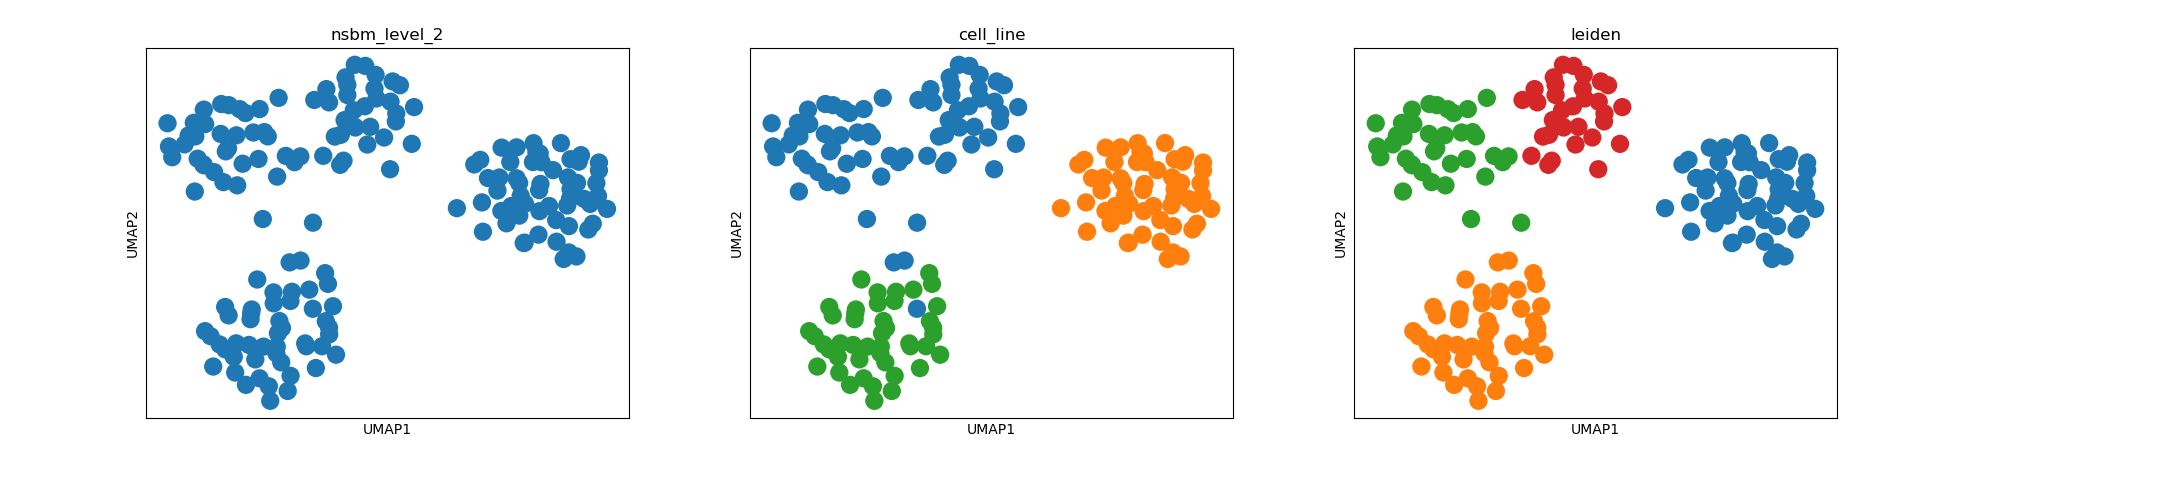

<IPython.core.display.Javascript object>


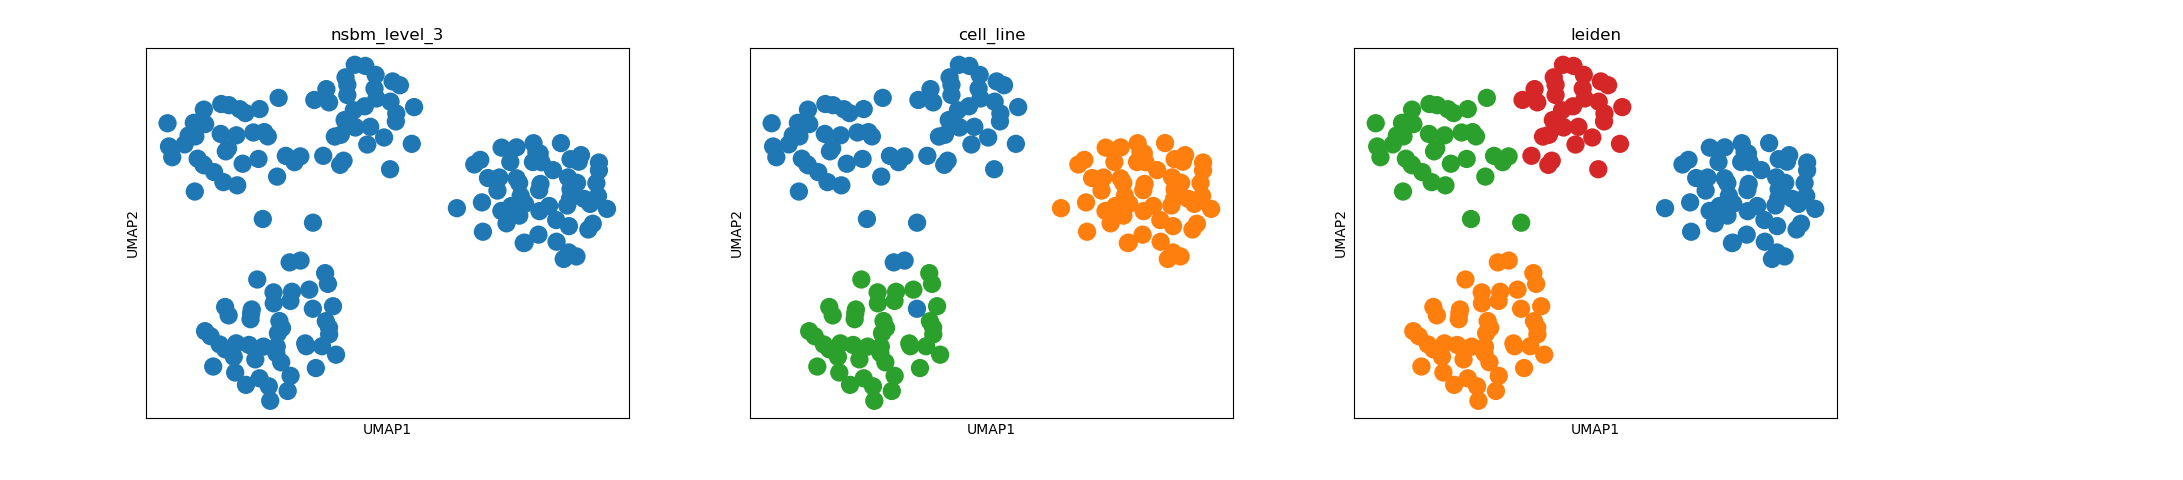

<IPython.core.display.Javascript object>


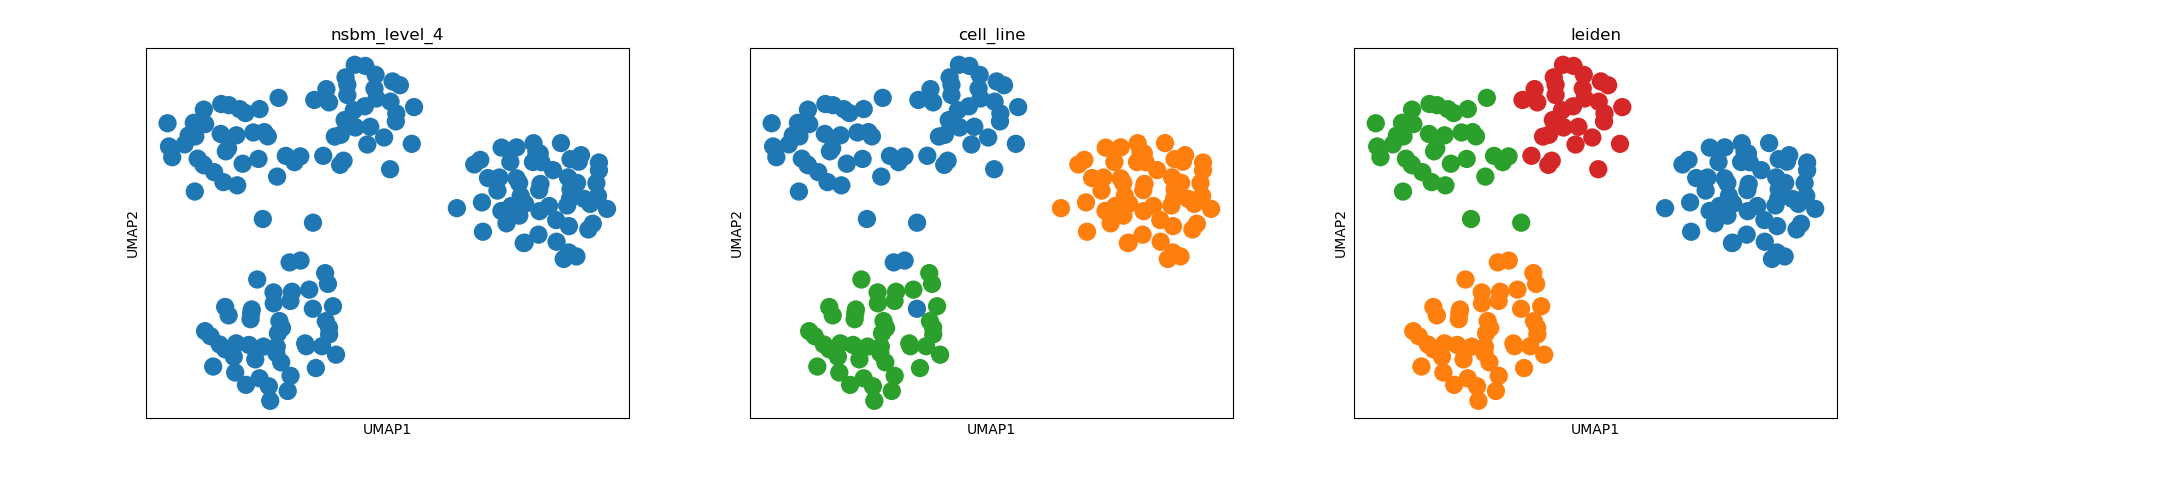

<IPython.core.display.Javascript object>


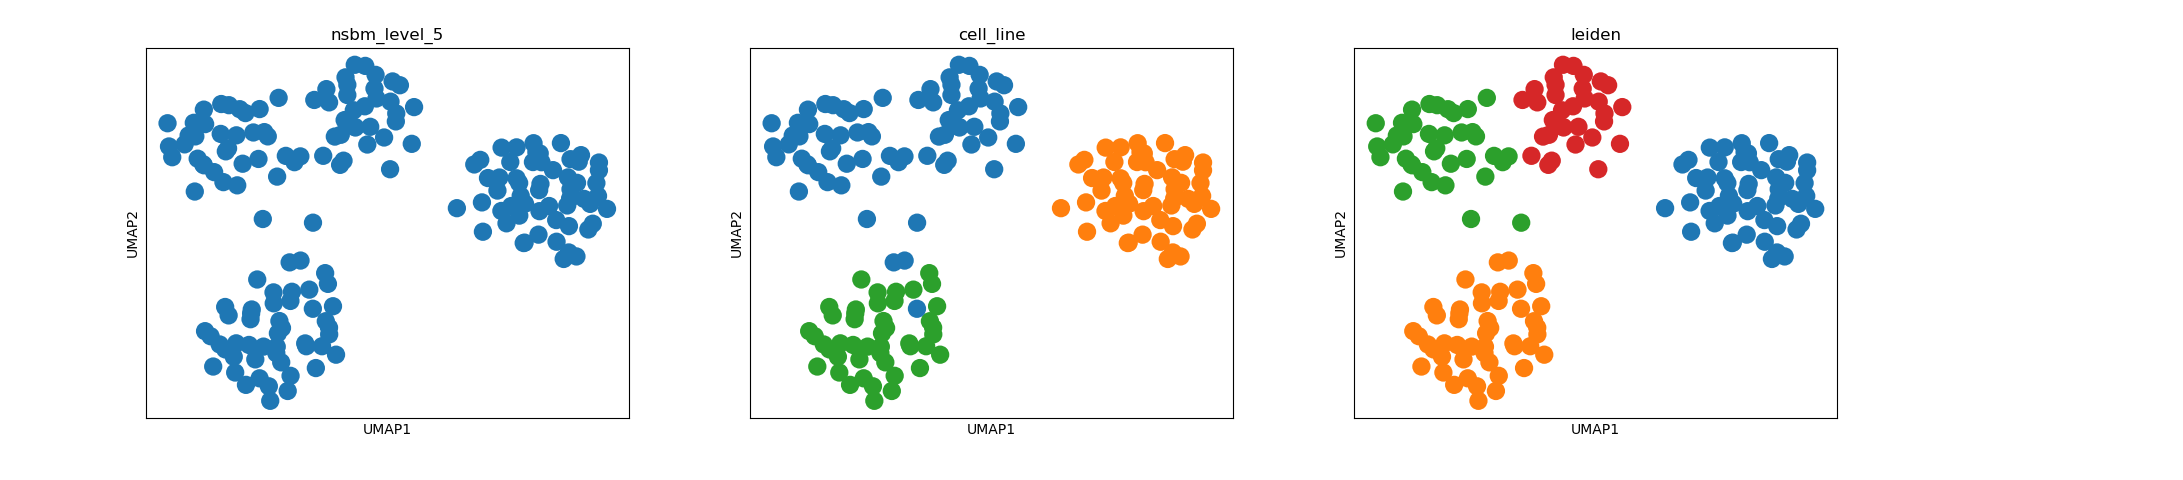

<IPython.core.display.Javascript object>


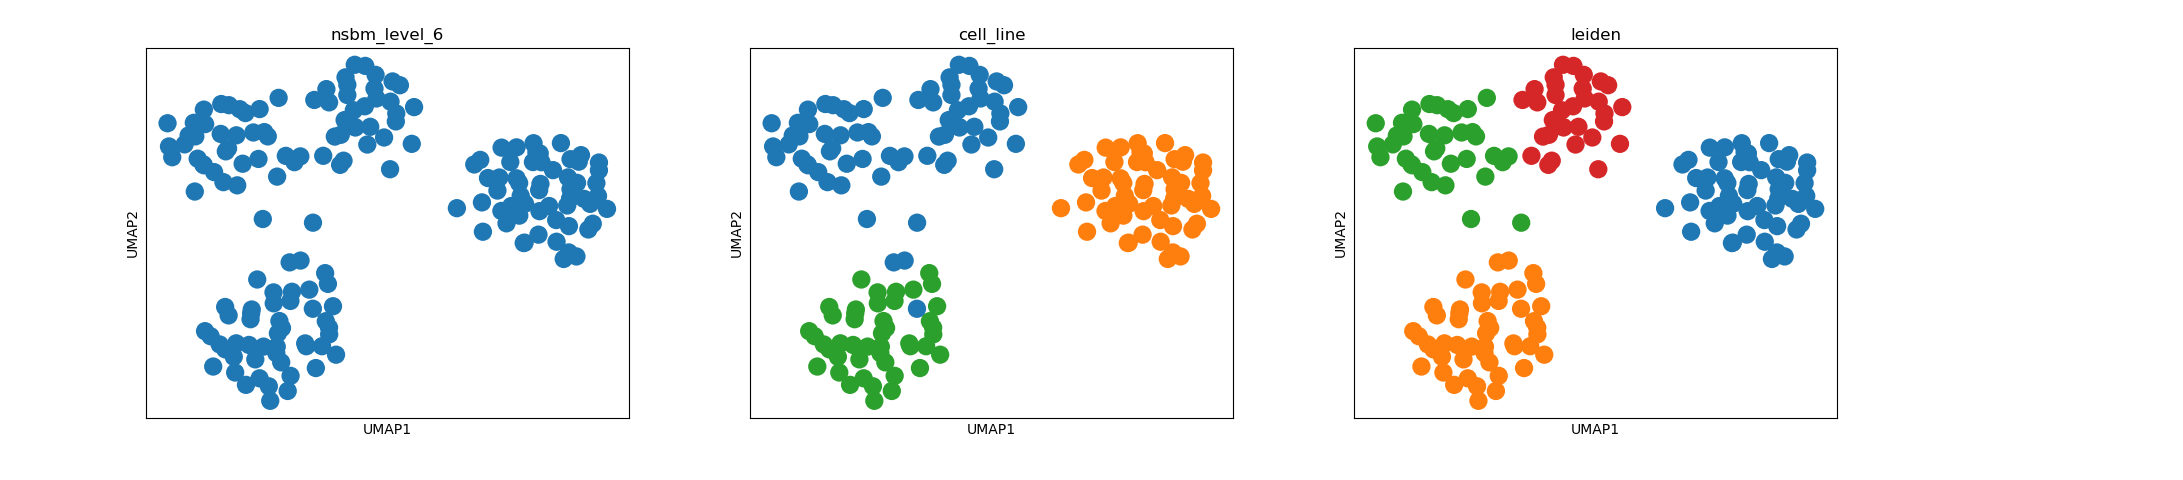

/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:472: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  n_panels_y * rcParams['figure.figsize'][1],


<IPython.core.display.Javascript object>


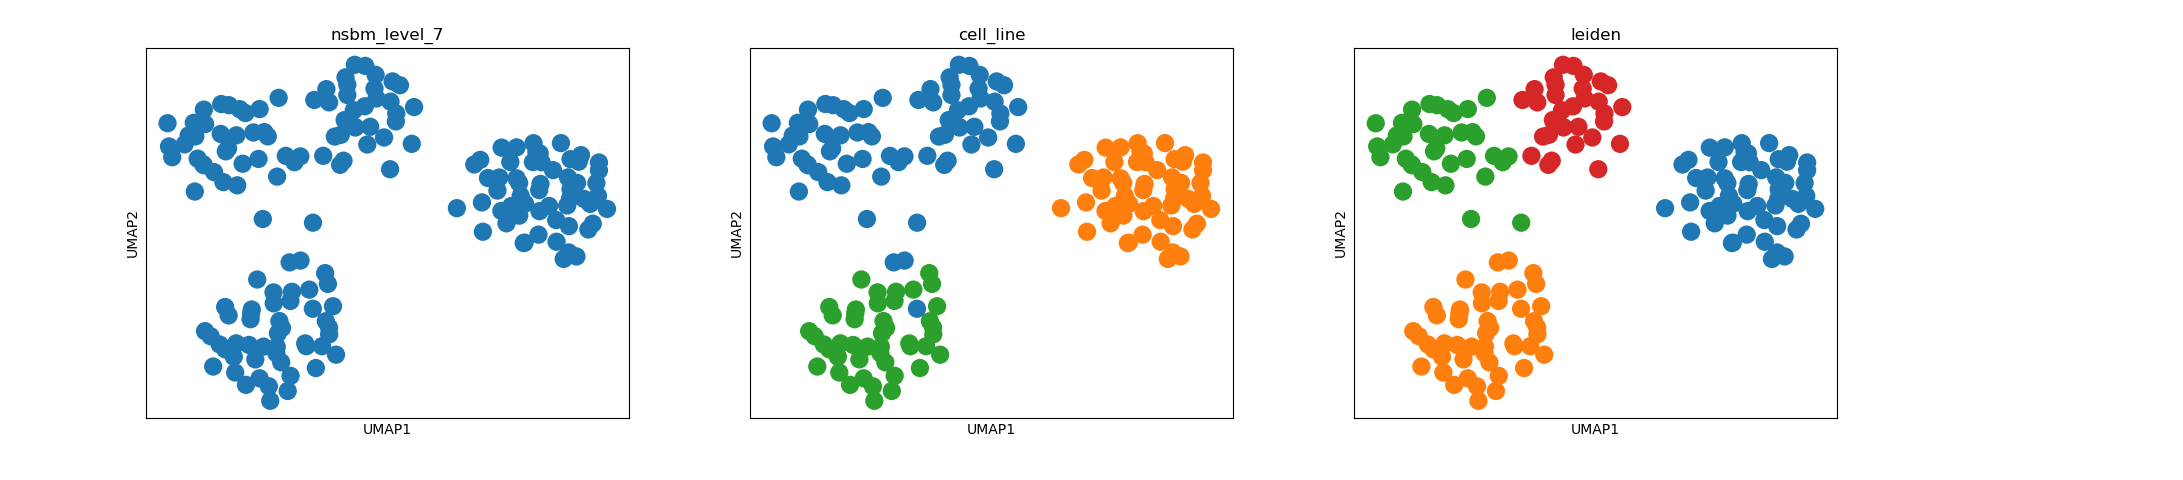

<IPython.core.display.Javascript object>


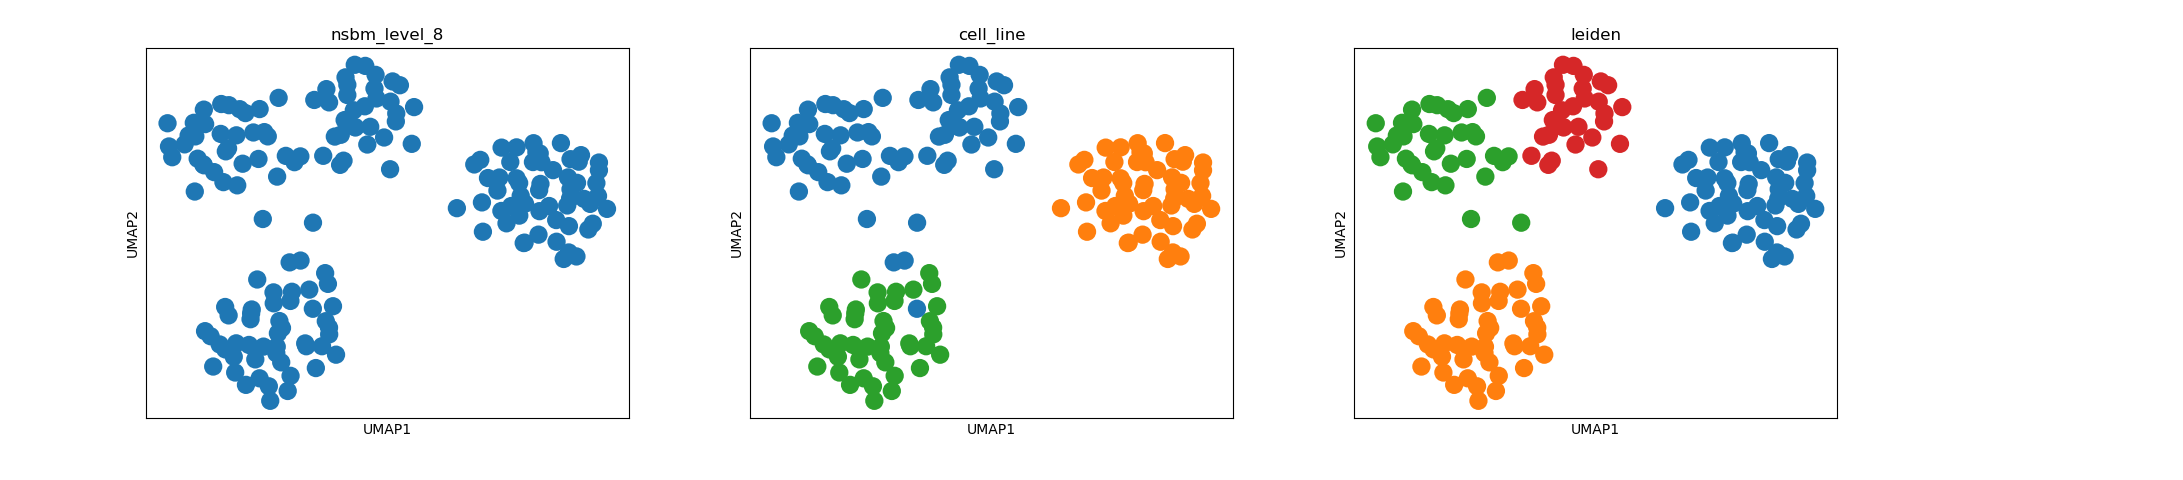

<IPython.core.display.Javascript object>


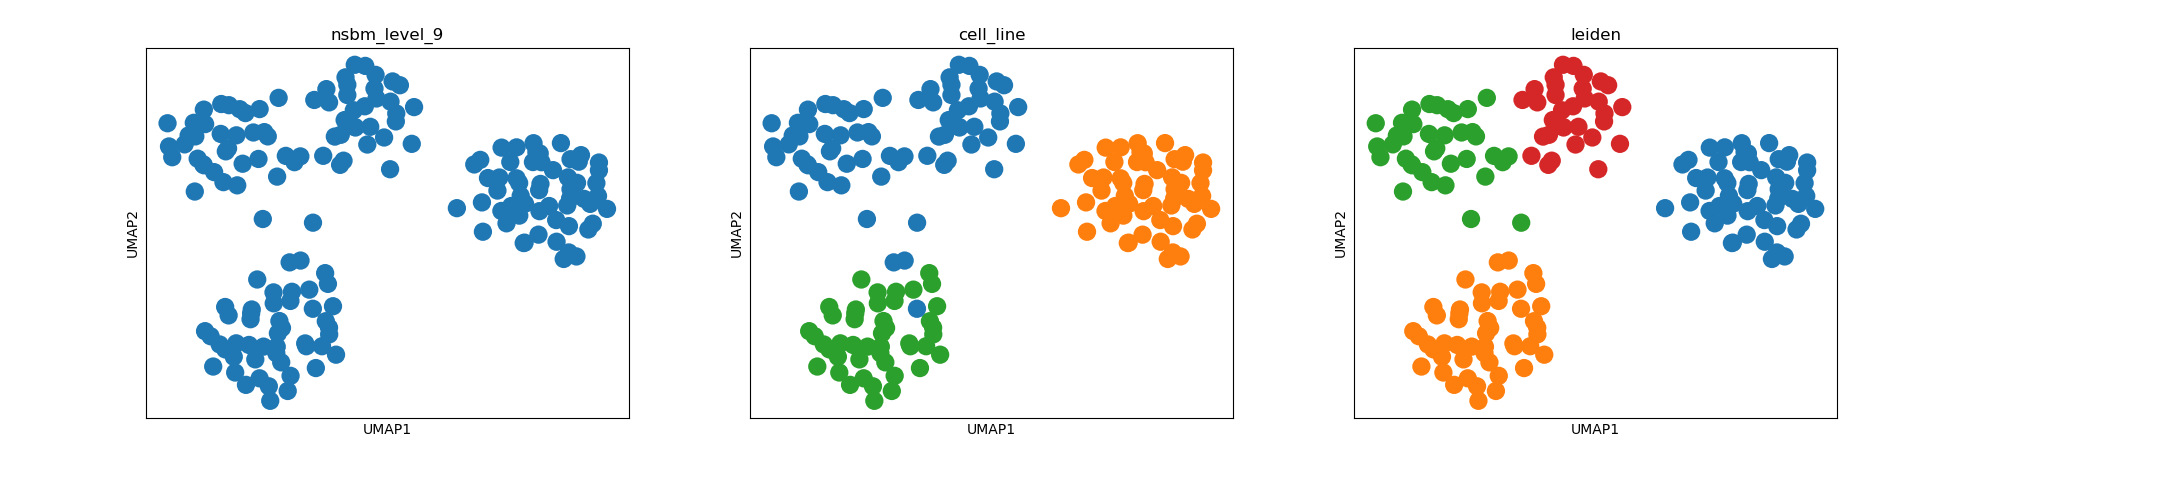

In [26]:
sc.tl.umap(unw_adata50)
sc.tl.leiden(unw_adata50)
sc.pl.umap(unw_adata50, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_2",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_3",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_4", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_5",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_6", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_7", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_8", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_9",'cell_line', 'leiden'], legend_loc='on_data')

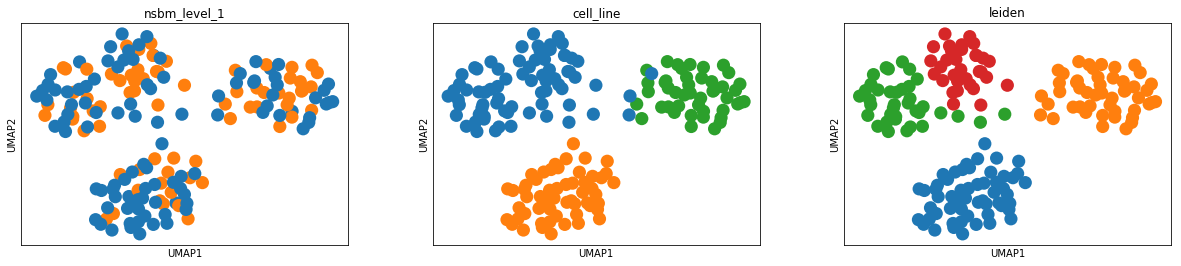

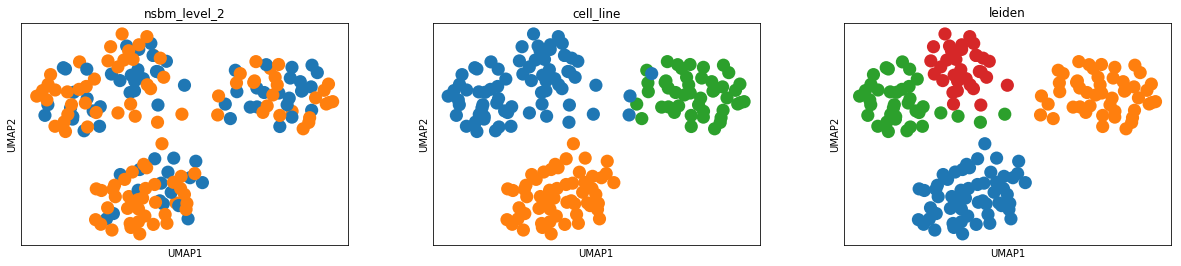

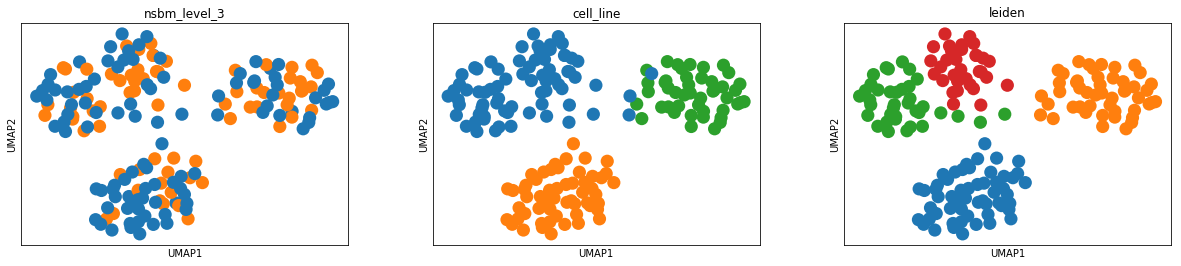

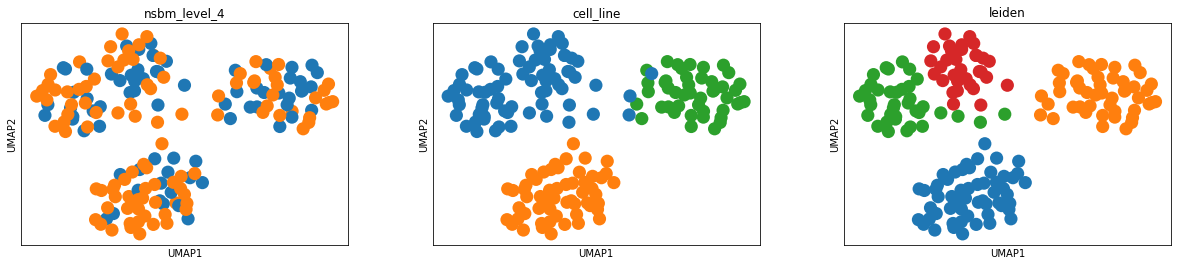

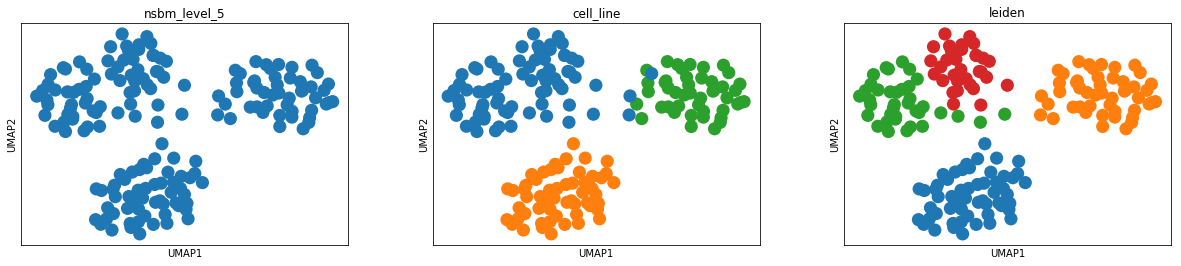

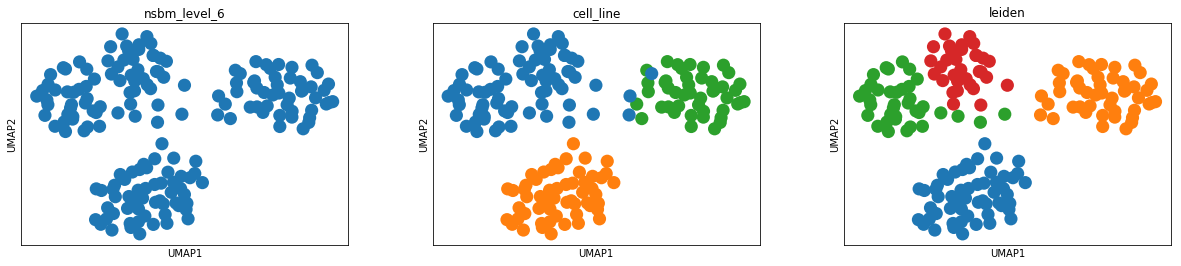

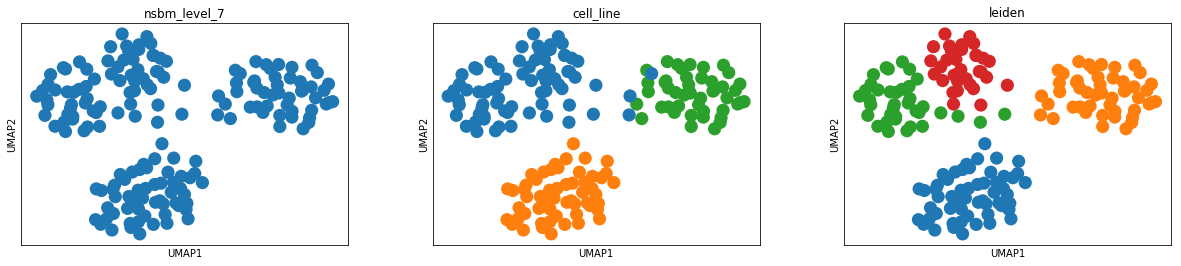

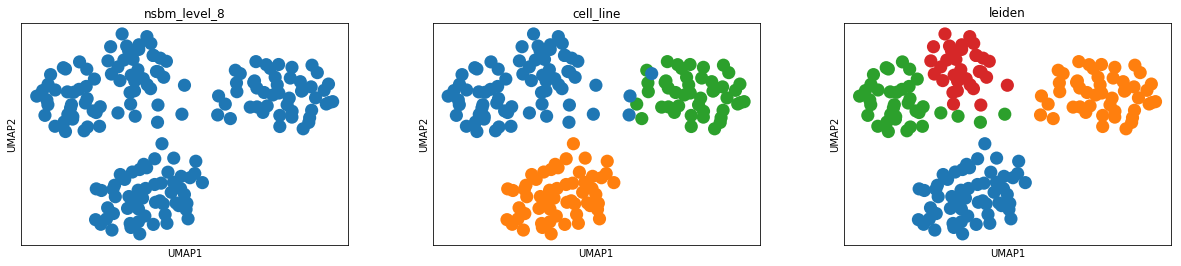

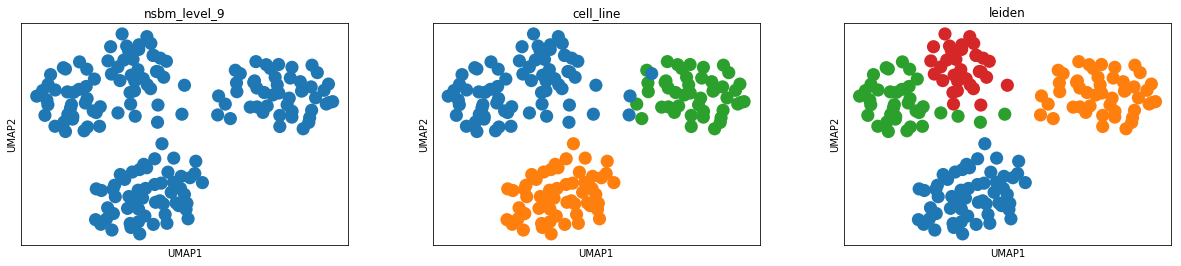

In [19]:
sc.tl.umap(unw_adata100)
sc.tl.leiden(unw_adata100)
sc.pl.umap(unw_adata100, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_2",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_3", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_4", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_5",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_6", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_7", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_8", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_9", 'cell_line','leiden'], legend_loc='on_data')

### weighted

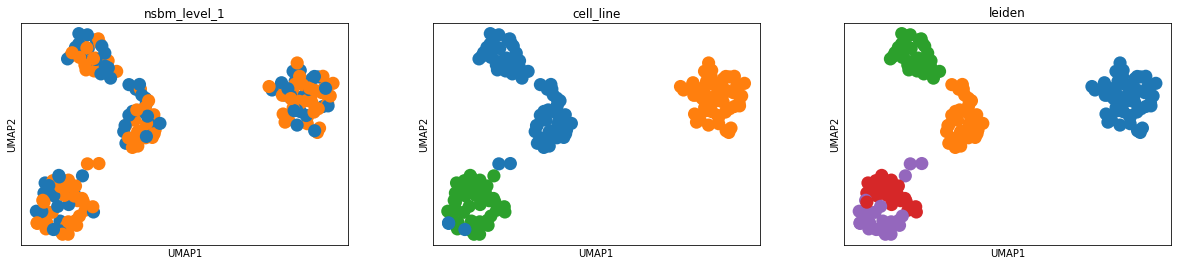

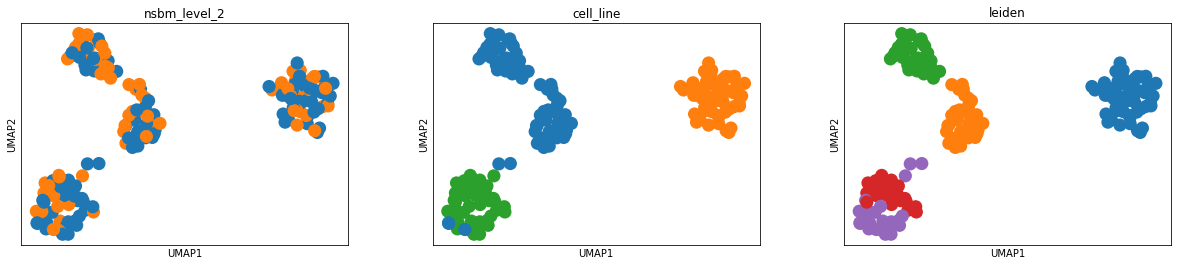

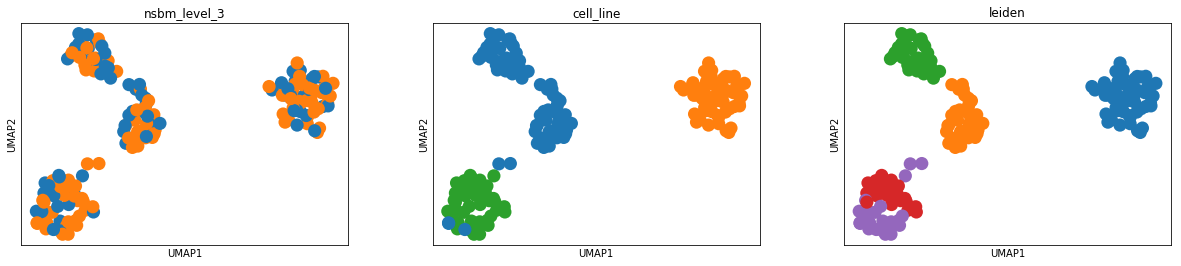

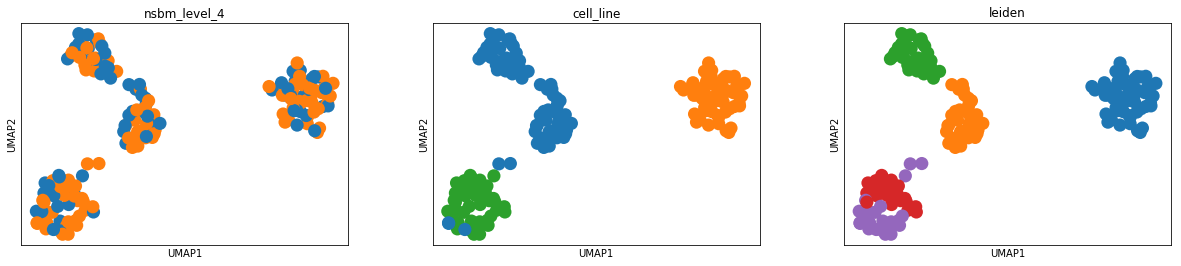

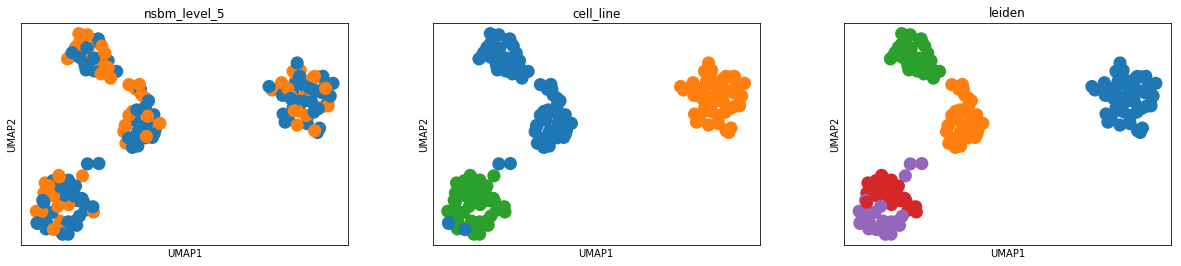

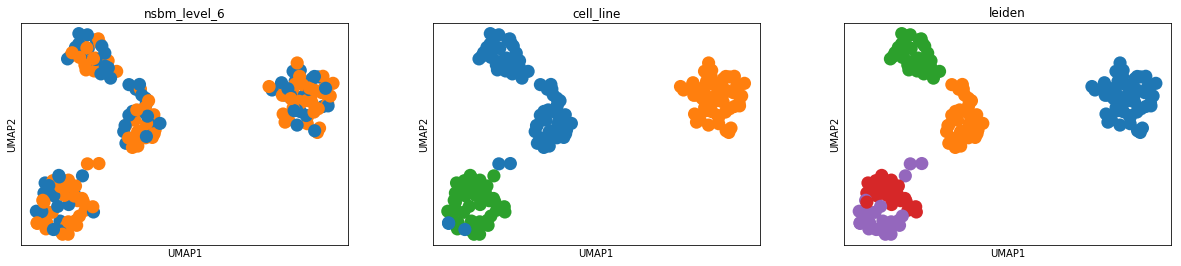

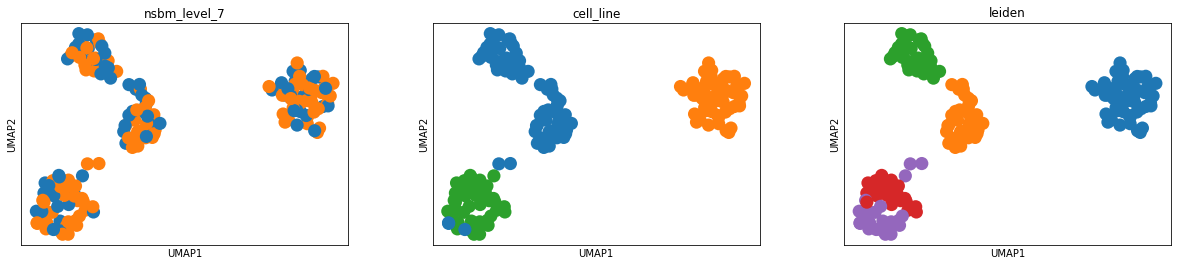

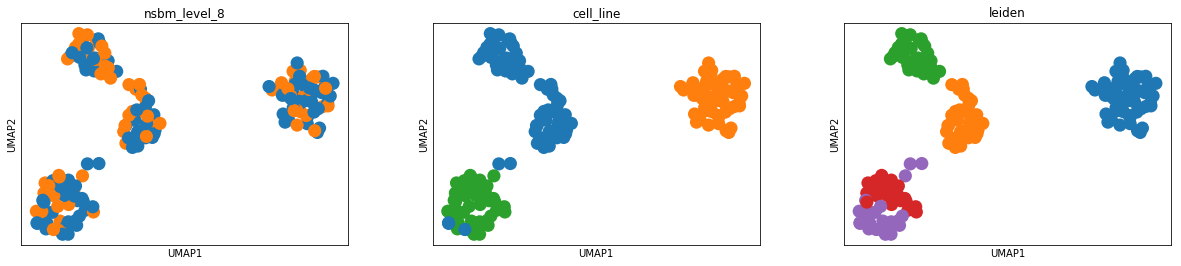

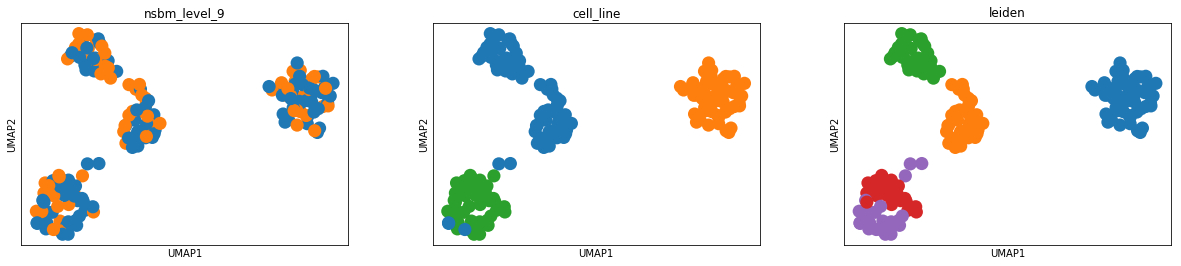

In [23]:
sc.tl.umap(w_adata5)
sc.tl.leiden(w_adata5)
sc.pl.umap(w_adata5, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_2",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_3",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_4",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_5",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_6",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_7", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_8",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_9", 'cell_line','leiden'], legend_loc='on_data')

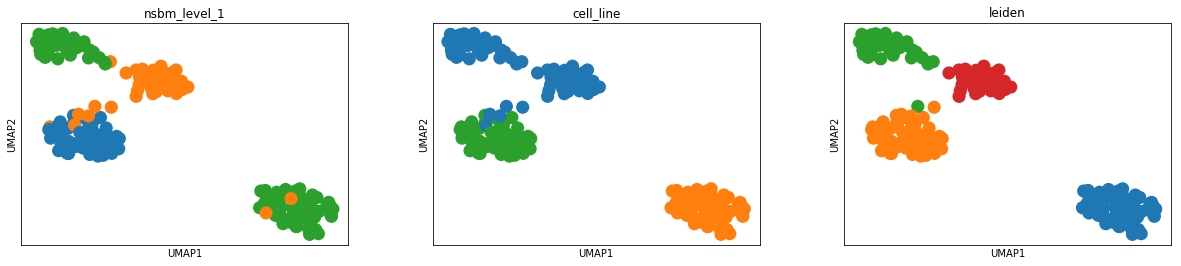

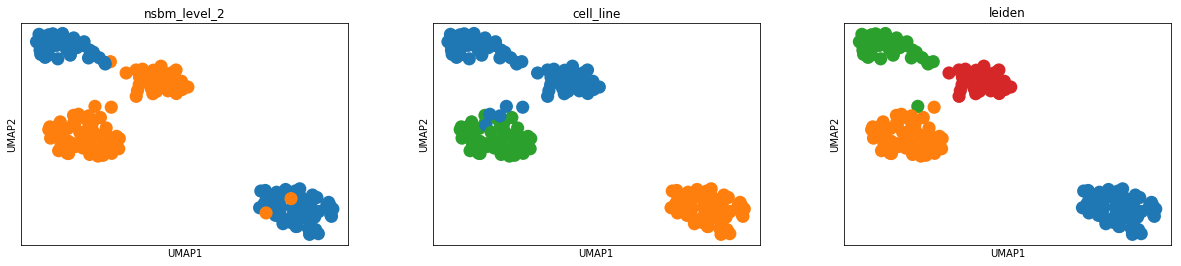

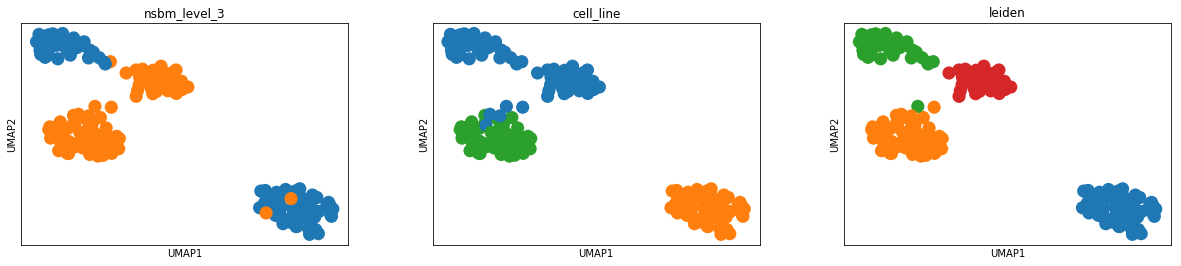

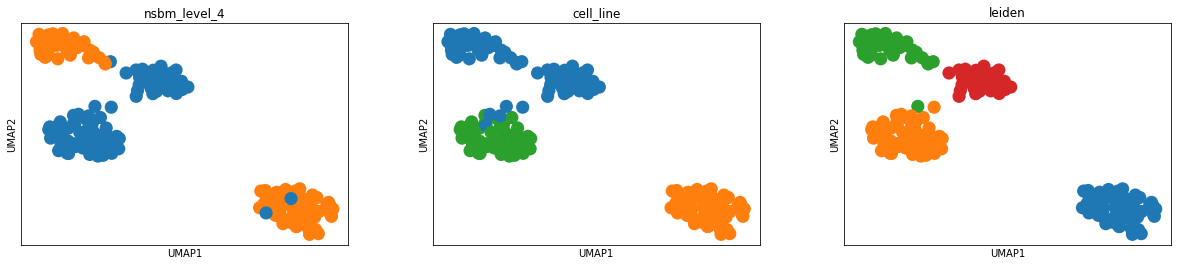

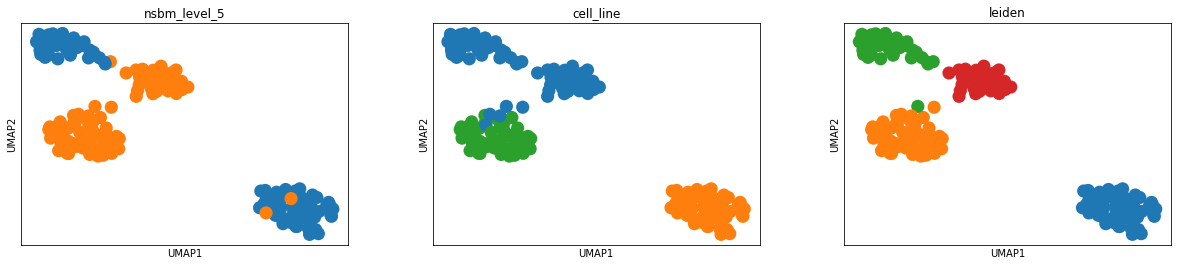

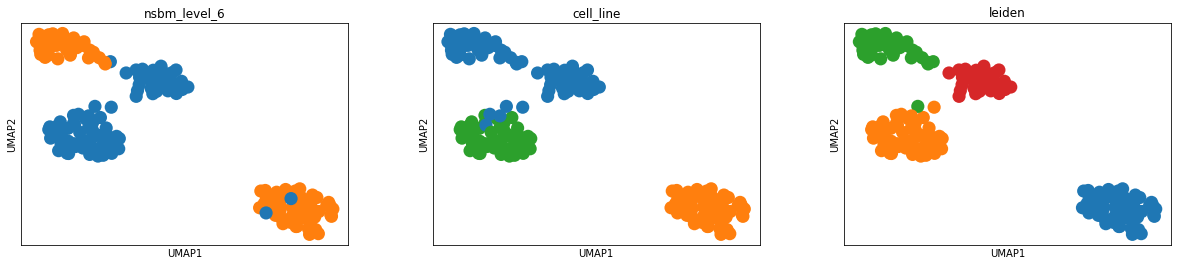

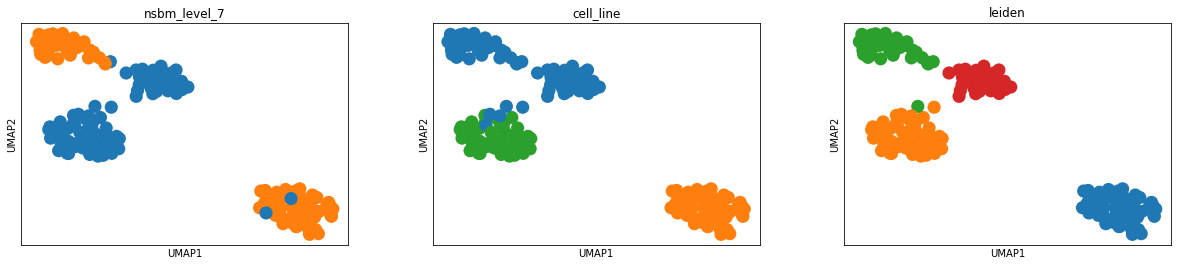

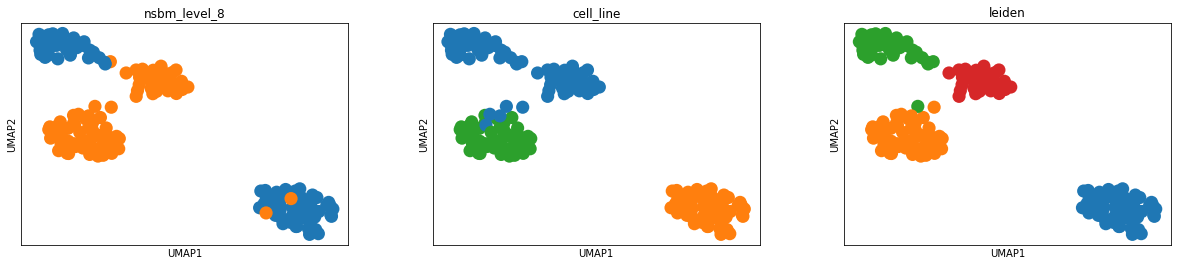

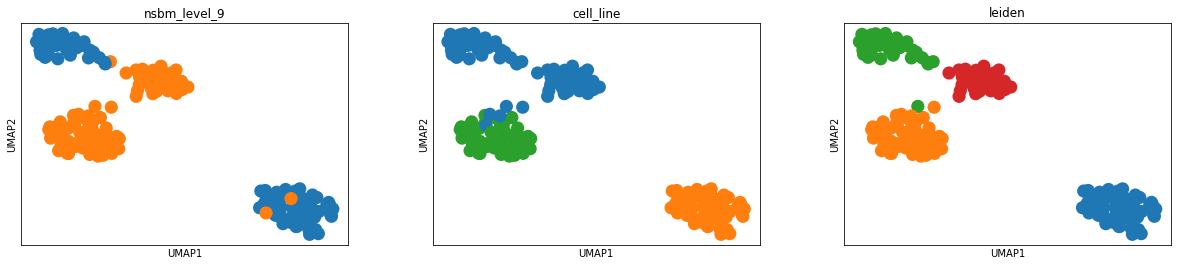

In [24]:
sc.tl.umap(w_adata10)
sc.tl.leiden(w_adata10)
sc.pl.umap(w_adata10, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_2",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_3",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_4",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_5",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_6",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_7",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_8",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_9", 'cell_line','leiden'], legend_loc='on_data')

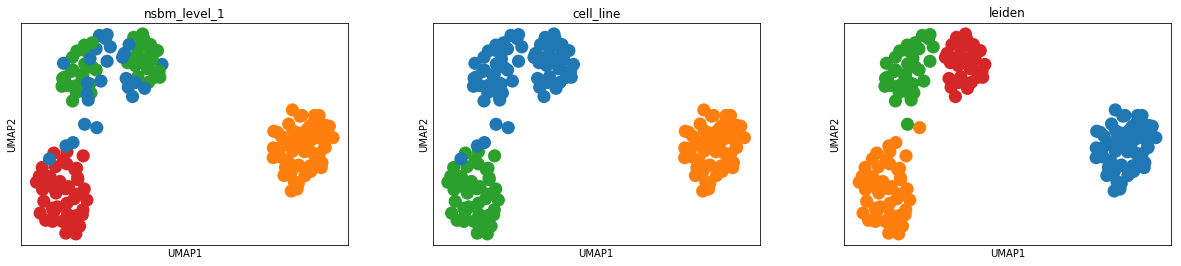

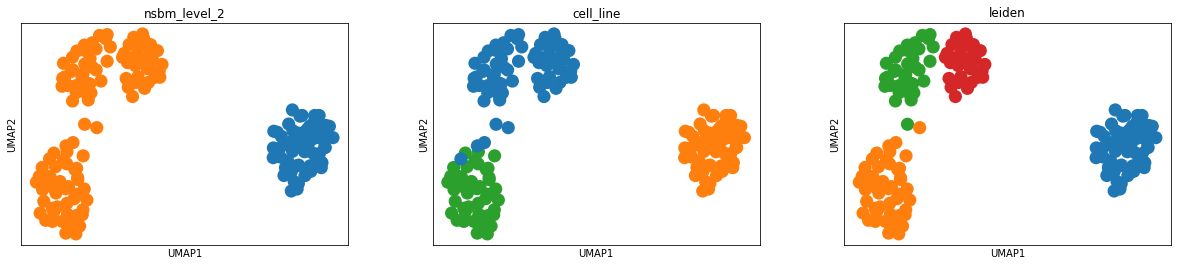

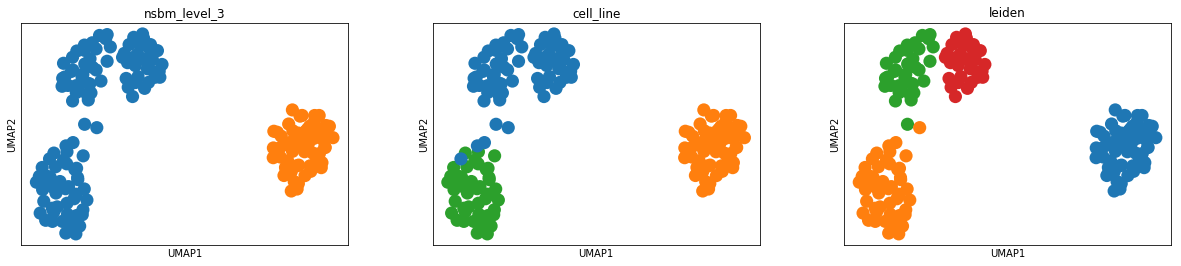

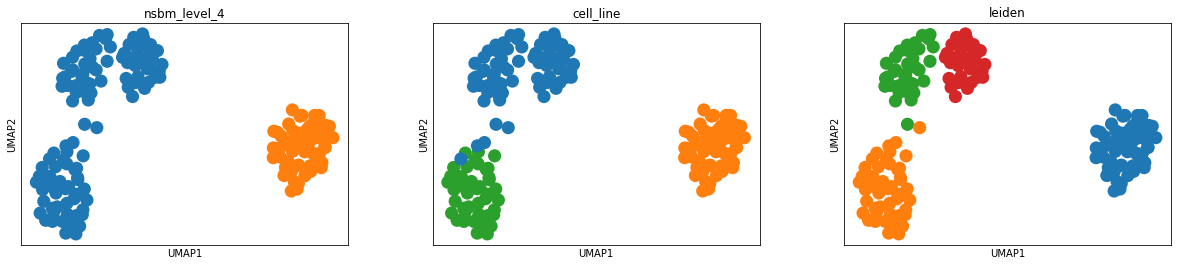

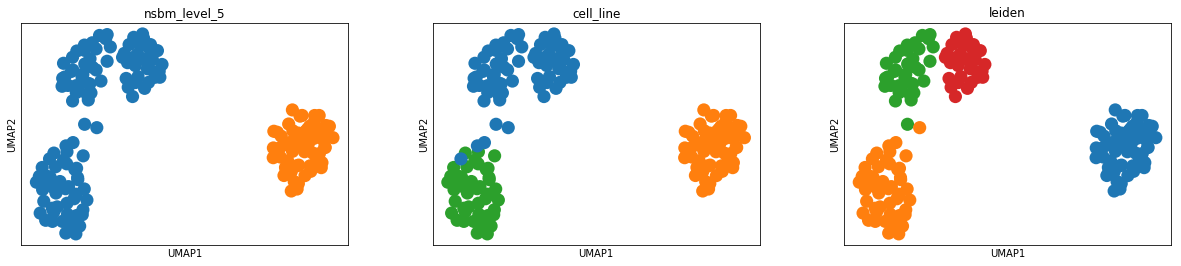

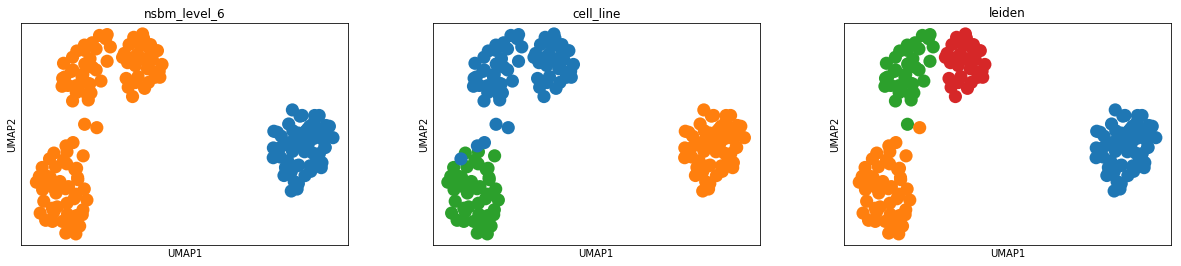

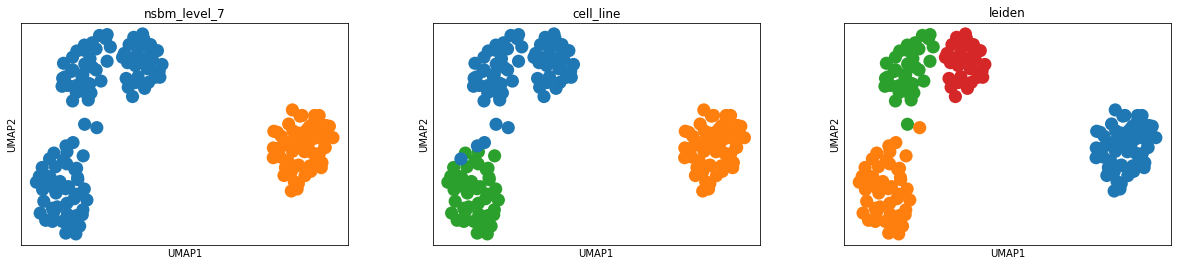

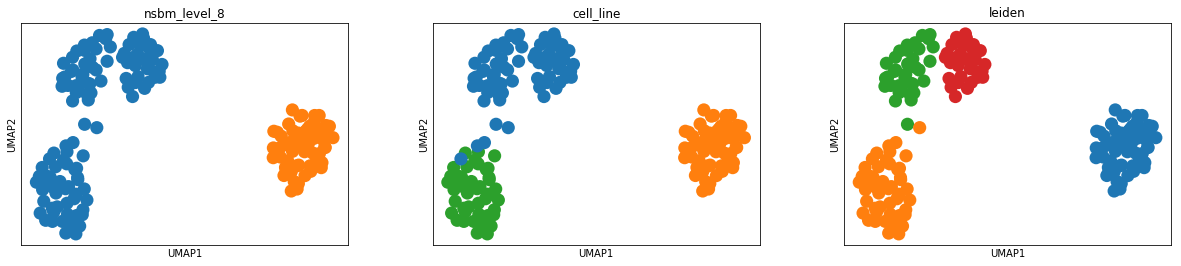

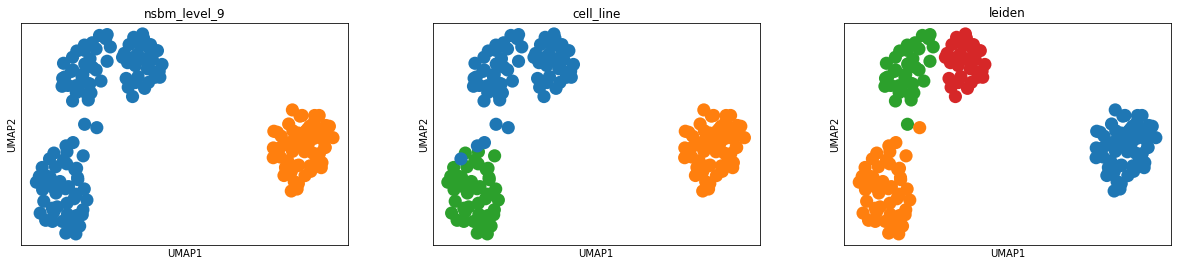

In [25]:
sc.tl.umap(w_adata20)
sc.tl.leiden(w_adata20)
sc.pl.umap(w_adata20, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_2",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_3",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_4",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_5",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_6",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_7",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_8",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_9", 'cell_line','leiden'], legend_loc='on_data')

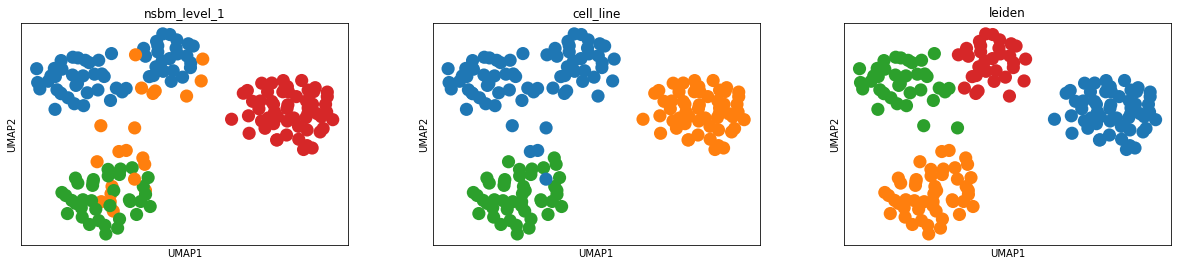

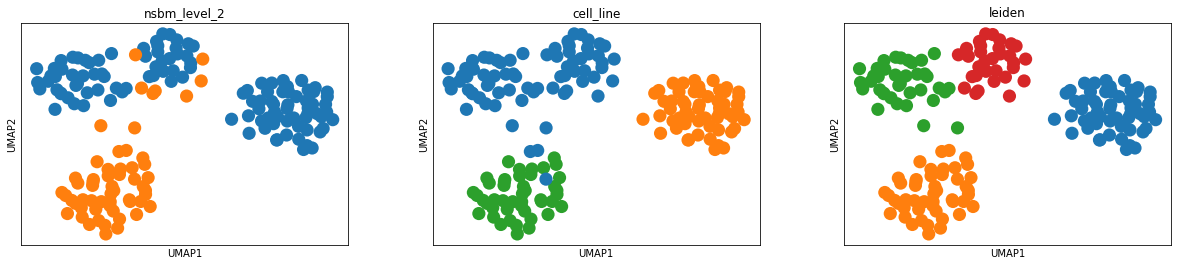

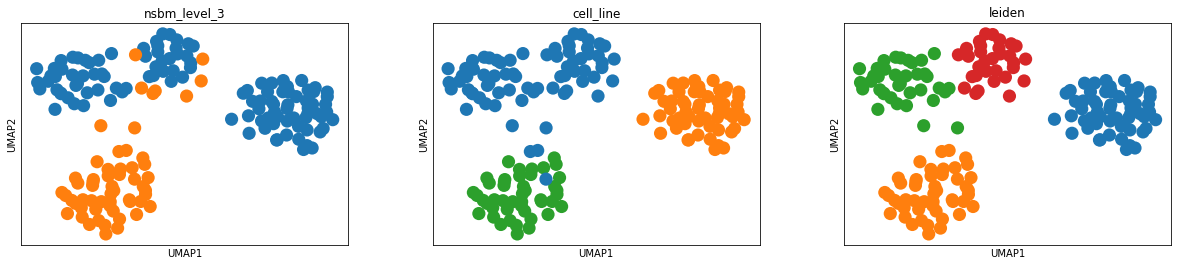

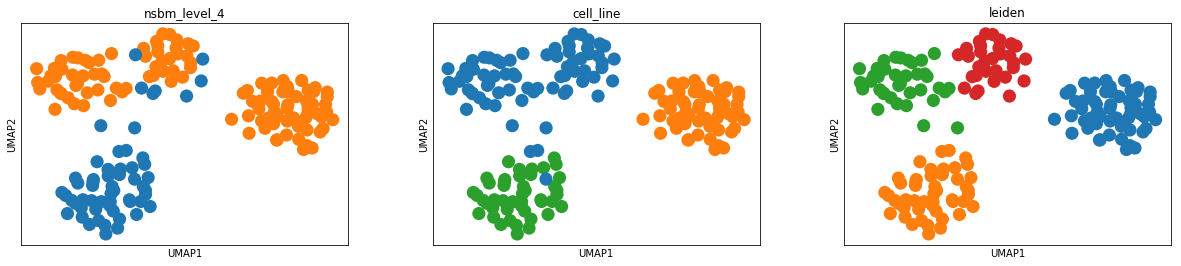

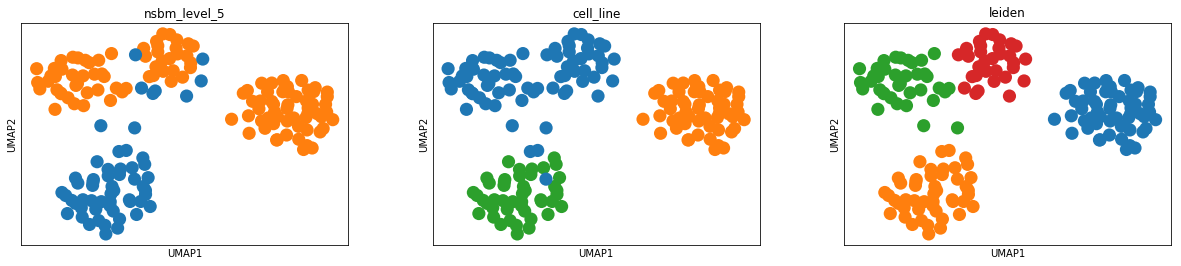

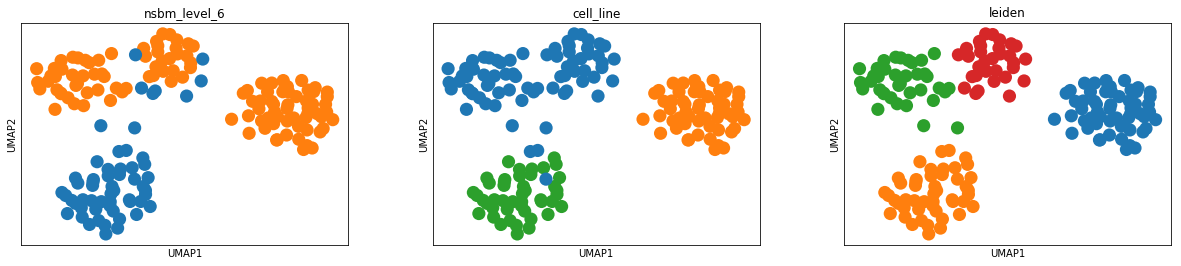

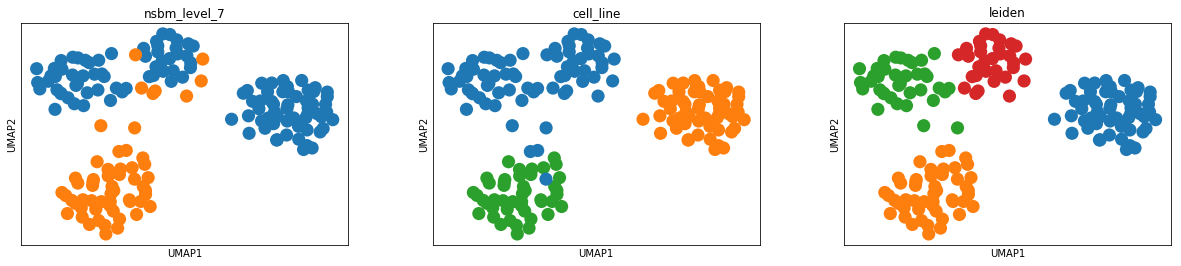

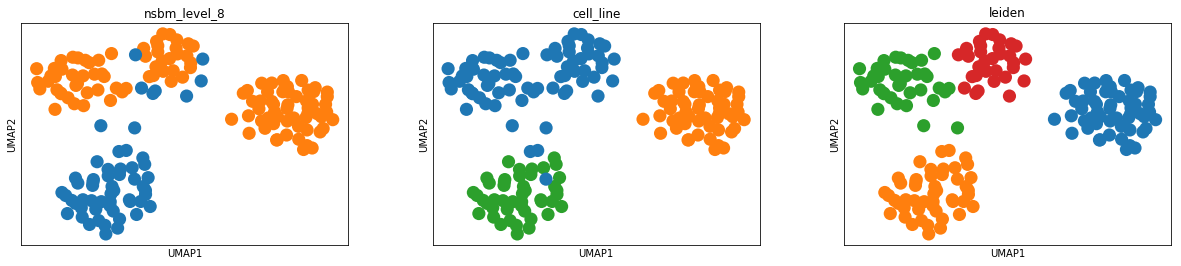

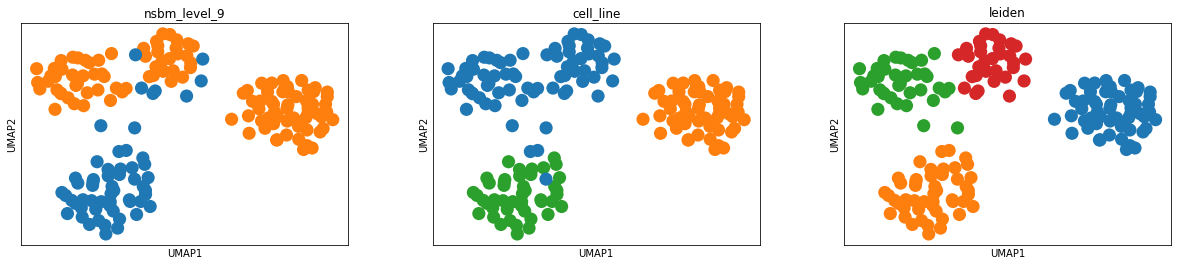

In [26]:
sc.tl.umap(w_adata50)
sc.tl.leiden(w_adata50)
sc.pl.umap(w_adata50, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_2", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_3", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_4", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_5", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_6",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_7", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_8", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_9", 'cell_line','leiden'], legend_loc='on_data')

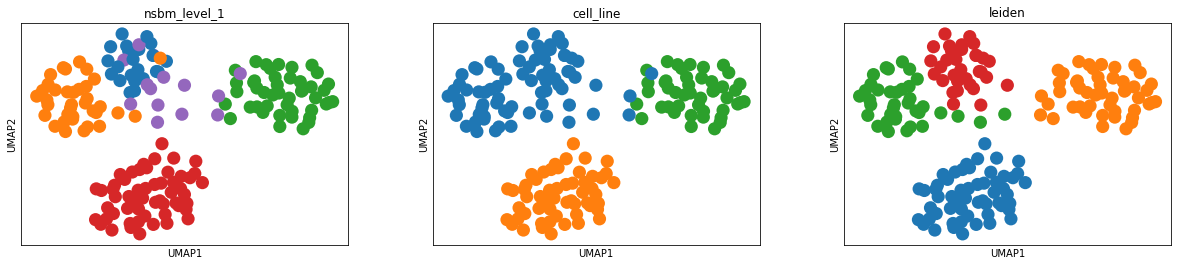

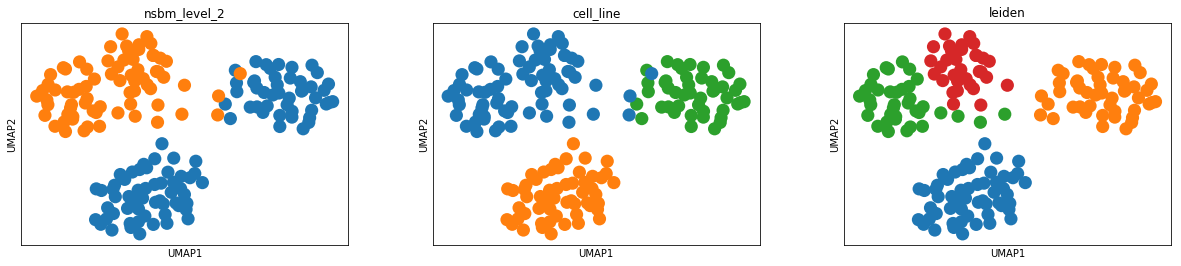

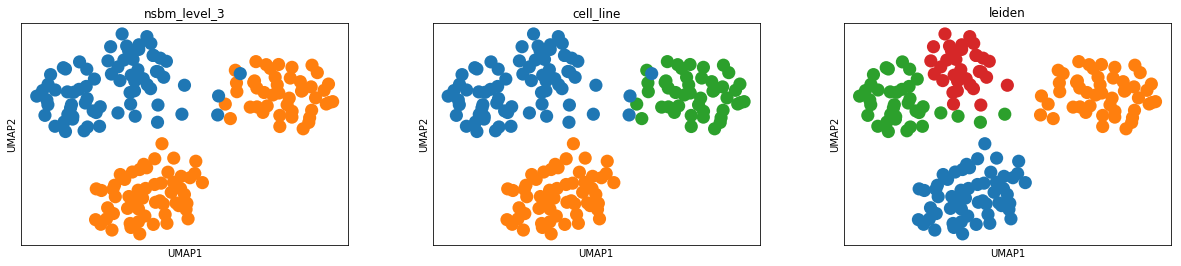

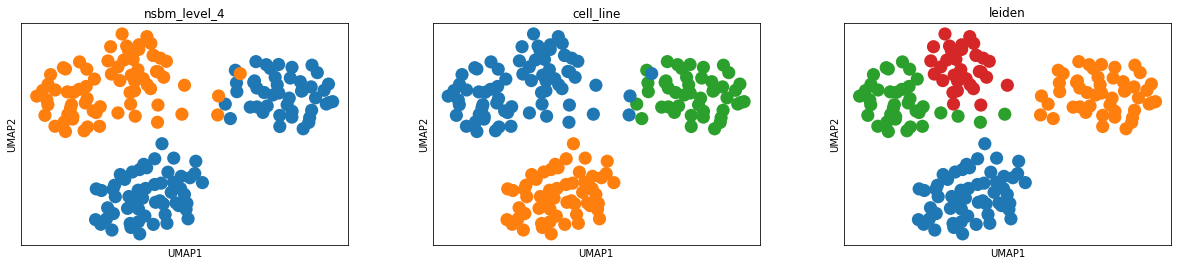

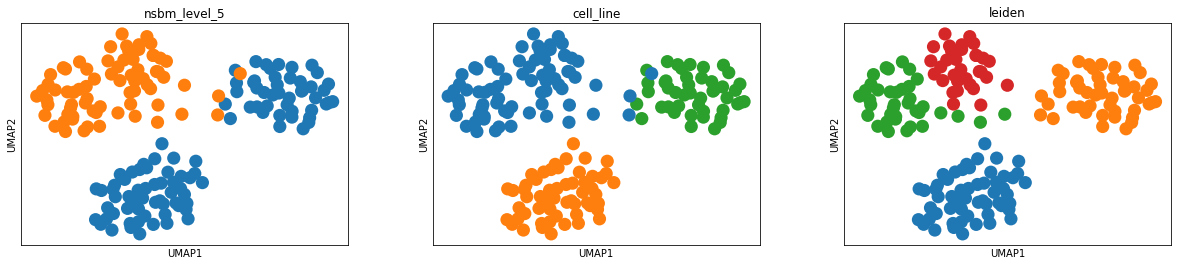

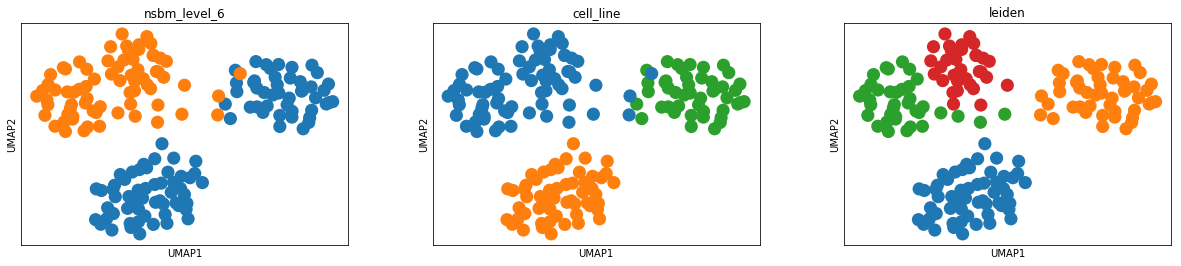

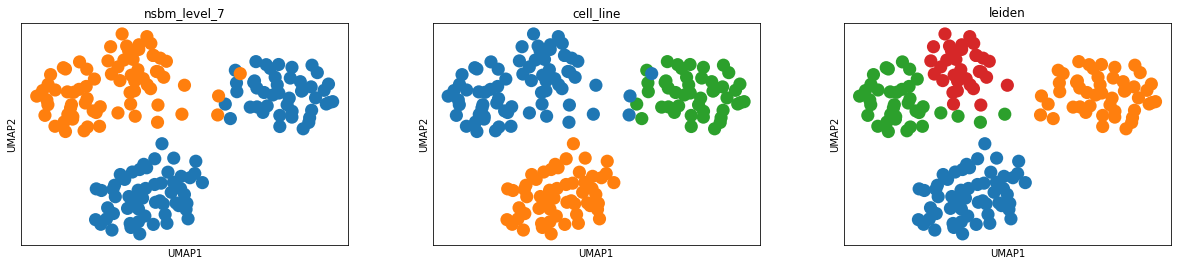

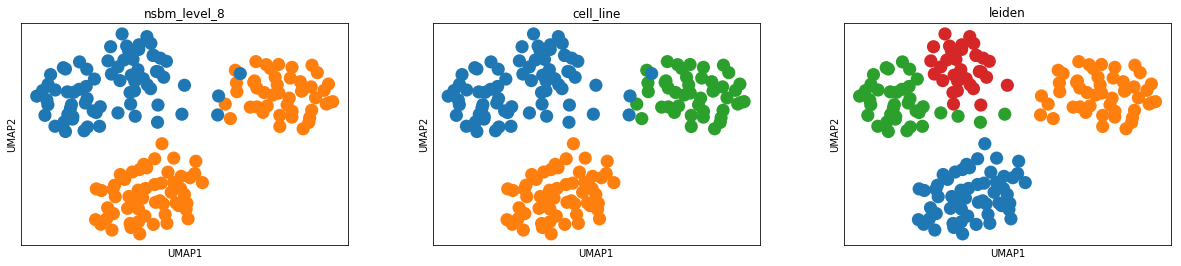

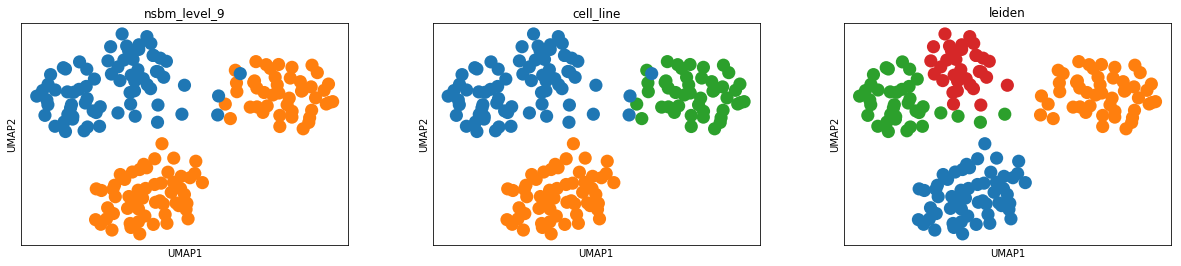

In [27]:
sc.tl.umap(w_adata100)
sc.tl.leiden(w_adata100)
sc.pl.umap(w_adata100, color=["nsbm_level_1",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_2", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_3", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_4", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_5", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_6", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_7", 'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_8",'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_9", 'cell_line','leiden'], legend_loc='on_data')

# 3) MI comparison
### 3.1) nsbm unweighted vs leiden unweighted

##### adata5

In [7]:
nsbm_levels = [x for x in unw_adata5.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters5.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata5.obs.loc[:, NL], 
                                           unw_leiden_clusters5.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_5_unwleiden_unwnsbm.csv','wb'),2)

##### adata10

In [8]:
nsbm_levels = [x for x in unw_adata10.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters10.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata10.obs.loc[:, NL], 
                                           unw_leiden_clusters10.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_10_unwleiden_unwnsbm.csv','wb'),2)

##### adata20

In [9]:
nsbm_levels = [x for x in unw_adata20.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters20.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata20.obs.loc[:, NL], 
                                           unw_leiden_clusters20.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_20_unwleiden_unwnsbm.csv','wb'),2)

##### adata30

In [10]:
nsbm_levels = [x for x in unw_adata30.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters30.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata30.obs.loc[:, NL], 
                                           unw_leiden_clusters30.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_30_unwleiden_unwnsbm.csv','wb'),2)

##### adata40

In [11]:
nsbm_levels = [x for x in unw_adata40.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters40.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata40.obs.loc[:, NL], 
                                           unw_leiden_clusters40.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_40_unwleiden_unwnsbm.csv','wb'),2)

##### adata50

In [12]:
nsbm_levels = [x for x in unw_adata50.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters50.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata50.obs.loc[:, NL], 
                                           unw_leiden_clusters50.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_50_unwleiden_unwnsbm.csv','wb'),2)

##### adata100

In [13]:
nsbm_levels = [x for x in unw_adata100.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters100.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata100.obs.loc[:, NL], 
                                           unw_leiden_clusters100.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_100_unwleiden_unwnsbm.csv','wb'),2)

### 3.2) nsbm weighted vs leiden weighted

##### adata5

In [ ]:
nsbm_levels = [x for x in w_adata5.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters5.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata5.obs.loc[:, NL], 
                                           w_leiden_clusters5.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_5_wleiden_wnsbm.csv','wb'),2)

##### adata10

In [ ]:
nsbm_levels = [x for x in w_adata10.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters10.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata10.obs.loc[:, NL], 
                                           w_leiden_clusters10.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_10_wleiden_wnsbm.csv','wb'),2)

##### adata20

In [ ]:
nsbm_levels = [x for x in w_adata20.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters20.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata20.obs.loc[:, NL], 
                                           w_leiden_clusters20.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_20_wleiden_wnsbm.csv','wb'),2)

##### adata30

In [ ]:
nsbm_levels = [x for x in w_adata30.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters30.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata30.obs.loc[:, NL], 
                                           w_leiden_clusters30.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_30_wleiden_wnsbm.csv','wb'),2)

##### adata40

In [ ]:
nsbm_levels = [x for x in w_adata40.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters40.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata40.obs.loc[:, NL], 
                                           w_leiden_clusters40.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_40_wleiden_wnsbm.csv','wb'),2)

##### adata50

In [ ]:
nsbm_levels = [x for x in w_adata50.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters50.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata50.obs.loc[:, NL], 
                                           w_leiden_clusters50.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_50_wleiden_wnsbm.csv','wb'),2)

##### adata100

In [ ]:
nsbm_levels = [x for x in w_adata100.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters100.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata100.obs.loc[:, NL], 
                                           w_leiden_clusters100.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_100_wleiden_wnsbm.csv','wb'),2)

### 3.3) nsbm weighted vs leiden unweighted

##### adata5

In [ ]:
nsbm_levels = [x for x in w_adata5.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters5.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata5.obs.loc[:, NL], 
                                           unw_leiden_clusters5.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_5_unwleiden_wnsbm.csv','wb'),2)

##### adata10

In [ ]:
nsbm_levels = [x for x in w_adata10.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters10.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata10.obs.loc[:, NL], 
                                           unw_leiden_clusters10.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_10_unwleiden_wnsbm.csv','wb'),2)

##### adata20

In [ ]:
nsbm_levels = [x for x in w_adata20.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters20.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata20.obs.loc[:, NL], 
                                           unw_leiden_clusters20.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_20_unwleiden_wnsbm.csv','wb'),2)

##### adata30

In [ ]:
nsbm_levels = [x for x in w_adata30.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters30.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata30.obs.loc[:, NL], 
                                           unw_leiden_clusters30.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_30_unwleiden_wnsbm.csv','wb'),2)

##### adata40

In [ ]:
nsbm_levels = [x for x in w_adata40.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters40.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata40.obs.loc[:, NL], 
                                           unw_leiden_clusters40.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_40_unwleiden_wnsbm.csv','wb'),2)

##### adata50

In [ ]:
nsbm_levels = [x for x in w_adata50.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters50.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata50.obs.loc[:, NL], 
                                           unw_leiden_clusters50.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_50_unwleiden_wnsbm.csv','wb'),2)

##### adata100

In [ ]:
nsbm_levels = [x for x in w_adata100.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = unw_leiden_clusters100.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(w_adata100.obs.loc[:, NL], 
                                           unw_leiden_clusters100.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_drop_seq/mi_100_unwleiden_wnsbm.csv','wb'),2)

### 3.4) nsbm unweighted vs leiden weighted

##### adata5

In [14]:
nsbm_levels = [x for x in unw_adata5.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters5.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata5.obs.loc[:, NL], 
                                           w_leiden_clusters5.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_5_wleiden_unwnsbm.csv','wb'),2)

##### adata10

In [15]:
nsbm_levels = [x for x in unw_adata10.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters10.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata10.obs.loc[:, NL], 
                                           w_leiden_clusters10.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_10_wleiden_unwnsbm.csv','wb'),2)

##### adata20

In [16]:
nsbm_levels = [x for x in unw_adata20.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters20.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata20.obs.loc[:, NL], 
                                           w_leiden_clusters20.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_20_wleiden_unwnsbm.csv','wb'),2)

##### adata30

In [17]:
nsbm_levels = [x for x in unw_adata30.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters30.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata30.obs.loc[:, NL], 
                                           w_leiden_clusters30.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_30_wleiden_unwnsbm.csv','wb'),2)

##### adata40

In [18]:
nsbm_levels = [x for x in unw_adata40.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters40.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata40.obs.loc[:, NL], 
                                           w_leiden_clusters40.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_40_wleiden_unwnsbm.csv','wb'),2)

##### adata50

In [19]:
nsbm_levels = [x for x in unw_adata50.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters50.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata50.obs.loc[:, NL], 
                                           w_leiden_clusters50.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_50_wleiden_unwnsbm.csv','wb'),2)

##### adata100

In [20]:
nsbm_levels = [x for x in unw_adata100.obs_keys() if x.startswith("nsbm")]
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = w_leiden_clusters100.columns
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)
foobar= [sklearn.metrics.adjusted_mutual_info_score(unw_adata100.obs.loc[:, NL], 
                                           w_leiden_clusters100.loc[:, LR])
                                            for NL in nsbm_levels for LR in resolutions]
array=np.array(foobar).reshape((len(nsbm_levels), len(resolutions)))
for x in SBM_gruppi:
    for i in range(len(array)):
        leiden_vs_SBM.loc[:,x]=array[i] 
pickle.dump(leiden_vs_SBM, open('mi_dropseq/mi_100_wleiden_unwnsbm.csv','wb'),2)